* 수치 비율 표시참고: https://dailyheumsi.tistory.com/98

In [1]:
# 필요 패키지 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
csvFile = 'C:/Users/chunc/Desktop/데이터 샘플/0518_data.csv'
df = pd.read_csv(csvFile)
df.head()

,교량명,시설물종별등급구분,시도,시군구,교량연장,교량폭,차로수,상부구조형식,최종안전점검결과,설계활하중,준공후경과년수,경간수,최대경간장,교통량
0,진위교,2,경기도,평택시,125.0,21.0,4,PSCI거더교,B,DB-24,37,5,25.0,21443.0
1,풍계교,3,경기도,이천시,55.0,20.0,2,RC슬래브교,B,DB-24,27,4,15.0,5654.0
2,태평교,3,경기도,여주시,43.8,19.5,4,PSCI거더교,B,DB-24,32,2,21.9,8750.0
3,장평교,2,경기도,이천시,105.0,19.5,4,RC슬래브교,B,DB-24,30,7,15.0,14150.0
4,덕평교,3,경기도,여주시,32.0,10.0,2,RC슬래브교,B,DB-24,27,2,16.0,3739.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   교량명        5680 non-null   object 
 1   시설물종별등급구분  5680 non-null   object 
 2   시도         5680 non-null   object 
 3   시군구        5680 non-null   object 
 4   교량연장       5680 non-null   float64
 5   교량폭        5680 non-null   float64
 6   차로수        5680 non-null   int64  
 7   상부구조형식     5680 non-null   object 
 8   최종안전점검결과   5680 non-null   object 
 9   설계활하중      5680 non-null   object 
 10  준공후경과년수    5680 non-null   int64  
 11  경간수        5680 non-null   int64  
 12  최대경간장      5680 non-null   float64
 13  교통량        5680 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 621.4+ KB


## 단일 그래프

In [4]:
# 준공 후 경과년수에 따른 교통량 합계
def category_year(myYear):
    if myYear < 5:
        return '5년 미만'
    elif myYear < 10:
        return '5년 이상 10년 미만'
    elif myYear < 20:
        return '10년 이상 20년 미만'
    elif myYear < 30:
        return '20년 이상 30년 미만'
    elif myYear < 40:
        return '30년 이상 40년 미만'
    elif myYear < 50:
        return '40년 이상 50년 미만'
    else:
        return '50년 이상'

In [5]:
df['Cum_year'] = df['준공후경과년수'].apply(lambda x: category_year(x))

In [6]:
# 준공 후 경과년수별 교통량평균 확인
mean_Cumyear = df[['Cum_year', '교통량']].groupby(['Cum_year'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_Cumyear

,Cum_year,교통량
0,30년 이상 40년 미만,46507.083135
1,20년 이상 30년 미만,40090.173038
2,10년 이상 20년 미만,32253.581455
3,5년 미만,30476.037037
4,40년 이상 50년 미만,28950.217391
5,50년 이상,28890.975000
6,5년 이상 10년 미만,25274.126674


C:\Users\chunc\AppData\Local\Temp\ipykernel_66060\3873668749.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


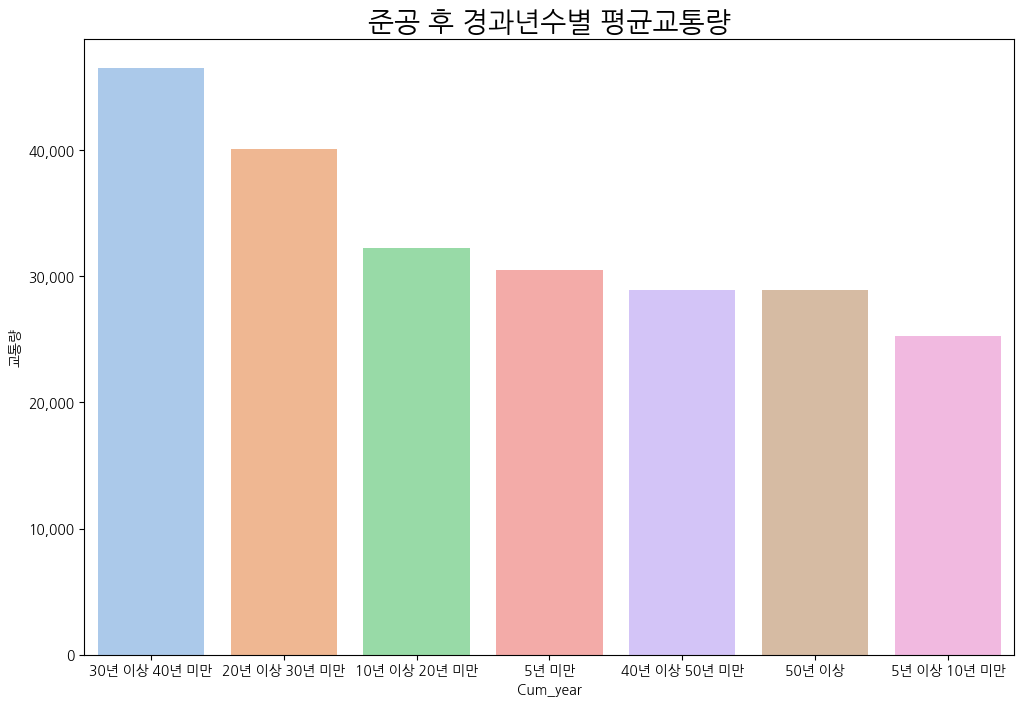

In [7]:
# 준공 후 경과년수별 교통량평균 그래프 확인
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Cum_year', y = '교통량', palette = 'pastel', data = mean_Cumyear)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('준공 후 경과년수별 평균교통량', fontsize = 20)
plt.show()

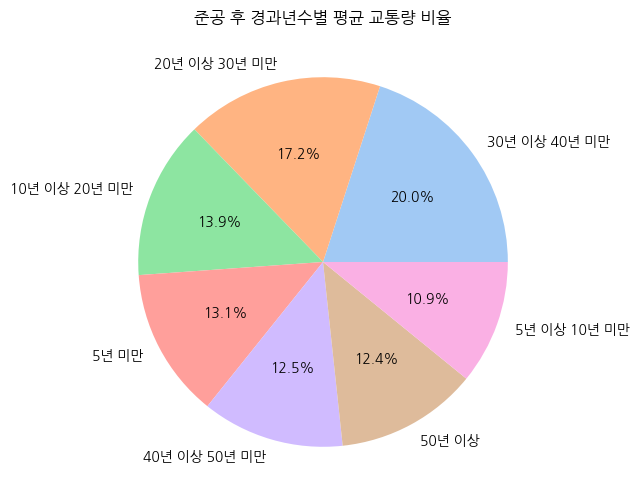

In [8]:
# 준공 후 경과년수별 평균교통량 비율 파이차트
sns.set_palette("pastel")
plt.figure(figsize = (8, 6))
plt.pie(mean_Cumyear['교통량'], labels = mean_Cumyear['Cum_year'], autopct='%1.1f%%')
plt.title('준공 후 경과년수별 평균 교통량 비율')
plt.show()

In [9]:
# 상부구조별 교통량합계 확인(범주화를 하지 않음)
mean_structure = df[['상부구조형식', '교통량']].groupby(['상부구조형식'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_structure

,상부구조형식,교통량
0,RC중공슬래브교,58288.322222
1,프리플렉스거더교,48651.187328
2,강플레이트거더교,45763.515152
3,강박스거더교,41745.217014
4,PSC박스거더교,41222.284483
5,엑스트라도즈드교,38759.333333
6,아치교,36889.648649
7,라멘교,36025.476296
8,PSC중공슬래브교,34910.722222
9,PSCI거더교,33645.480897


C:\Users\chunc\AppData\Local\Temp\ipykernel_66060\3639857547.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


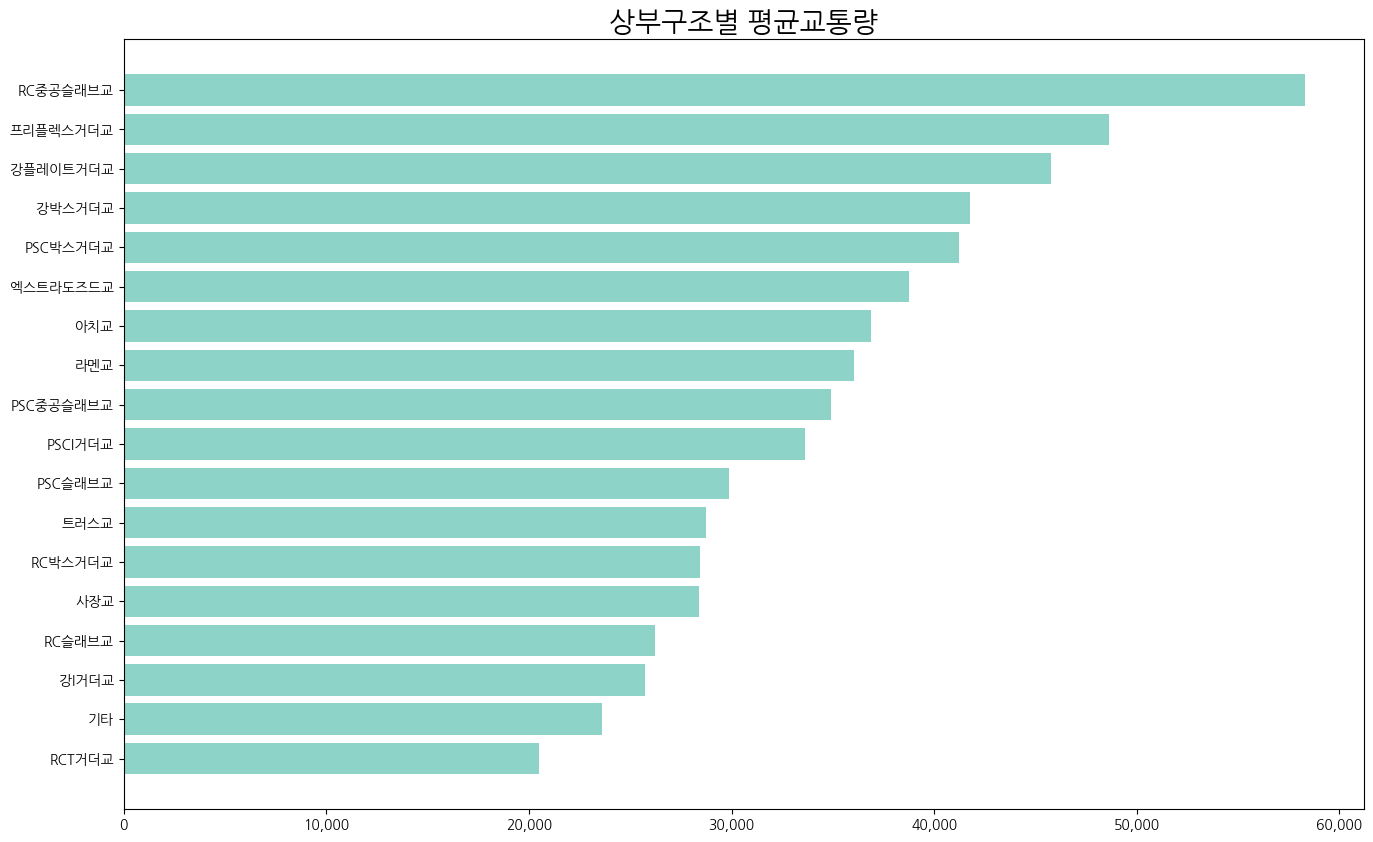

In [10]:
# 상부구조별 교통량평균 그래프 확인
sns.set_palette("Set3")
plt.figure(figsize = (16, 10))
mean_st = mean_structure.sort_values(by = '교통량', ascending = True)
plt.barh(mean_st['상부구조형식'], mean_st['교통량'])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('상부구조별 평균교통량', fontsize = 20)

plt.show()

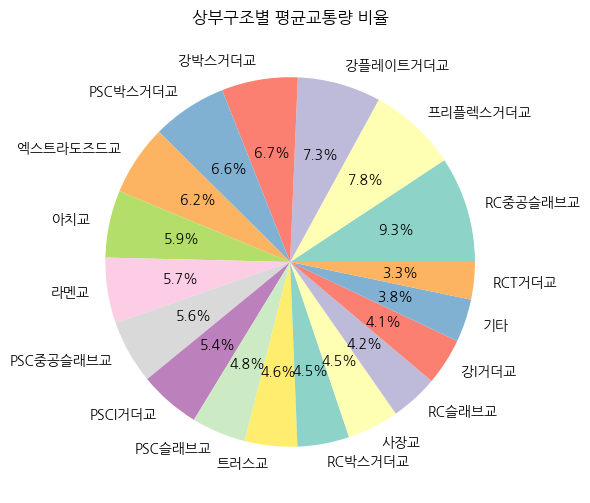

In [11]:
# 상부구조별 평균 교통량 비율 파이차트
plt.figure(figsize = (8, 6))
plt.pie(mean_structure['교통량'], labels = mean_structure['상부구조형식'], autopct='%1.1f%%')
plt.title('상부구조별 평균교통량 비율')
plt.show()

In [12]:
# 안전등급에 따른 평균교통량
mean_grade = df[['최종안전점검결과', '교통량']].groupby(['최종안전점검결과'], as_index = False).mean()
mean_grade

,최종안전점검결과,교통량
0,A,31535.904836
1,B,36789.297071
2,C,28899.013953
3,D,25800.000000
4,E,51694.412698


C:\Users\chunc\AppData\Local\Temp\ipykernel_66060\2657306575.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


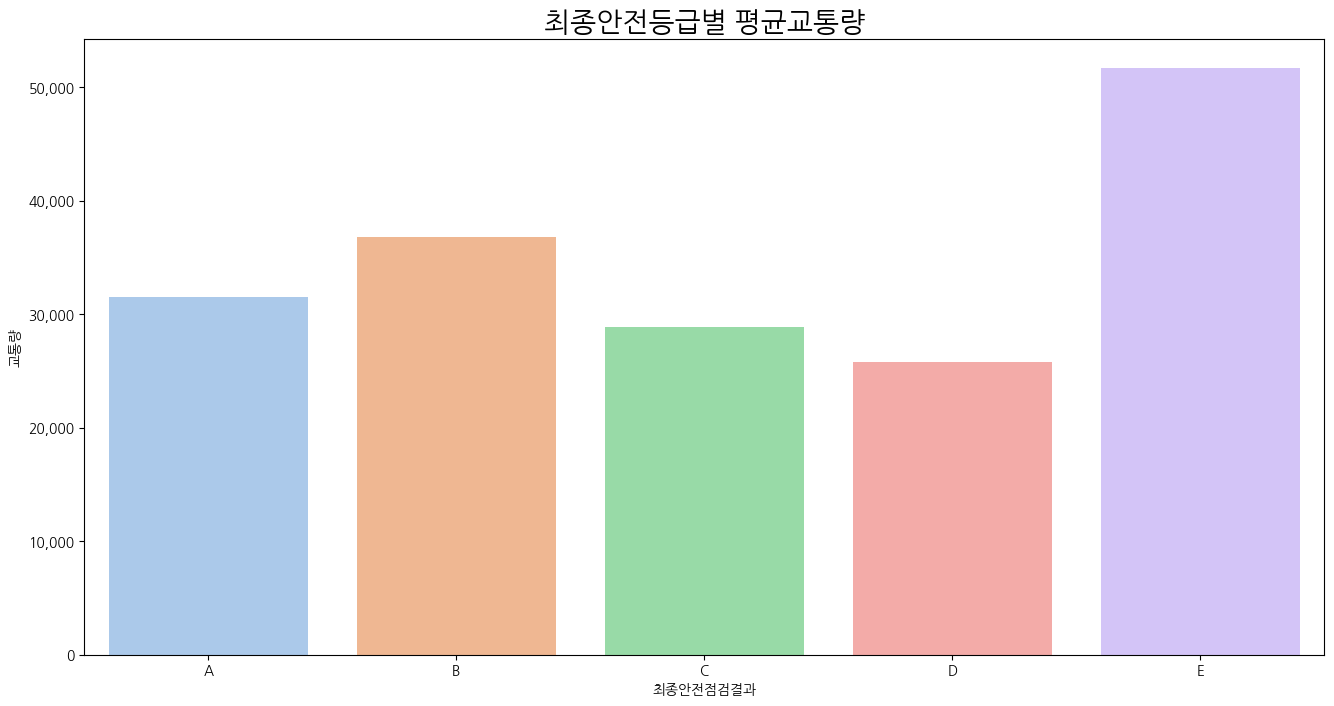

In [13]:
# 시설물등급에 따른 교통량평균 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = '최종안전점검결과', y = '교통량', palette = 'pastel', data = mean_grade)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('최종안전등급별 평균교통량', fontsize = 20)
plt.show()

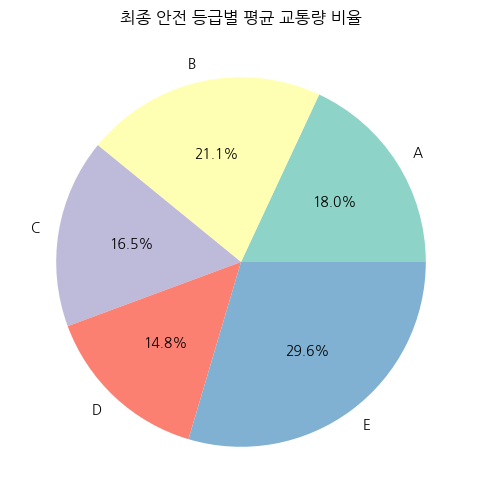

In [14]:
# 파이 그래프
plt.figure(figsize = (8, 6))
plt.pie(mean_grade['교통량'], labels = mean_grade['최종안전점검결과'], autopct='%1.1f%%')
plt.title('최종 안전 등급별 평균 교통량 비율')
plt.show()

In [15]:
# 새로운 시설물 등급컬럼 생성
# 1, 2, 3종 이외는 기타로 통합
def new_facility(facility):
    if facility == '1':
        return '1종 시설물'
    elif facility == '2':
        return '2종 시설물'
    elif facility == '3':
        return '3종 시설물'
    else:
        return '기타'

In [16]:
df['New_facility'] = df['시설물종별등급구분'].apply(lambda x: new_facility(x))

In [17]:
# 시설물등급에 따른 교통량평균
mean_facility = df[['New_facility', '교통량']].groupby(['New_facility'], as_index = False).mean()
mean_facility

,New_facility,교통량
0,1종 시설물,42815.115250
1,2종 시설물,34092.440391
2,3종 시설물,39089.986878
3,기타,30242.700214


C:\Users\chunc\AppData\Local\Temp\ipykernel_66060\1605370791.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


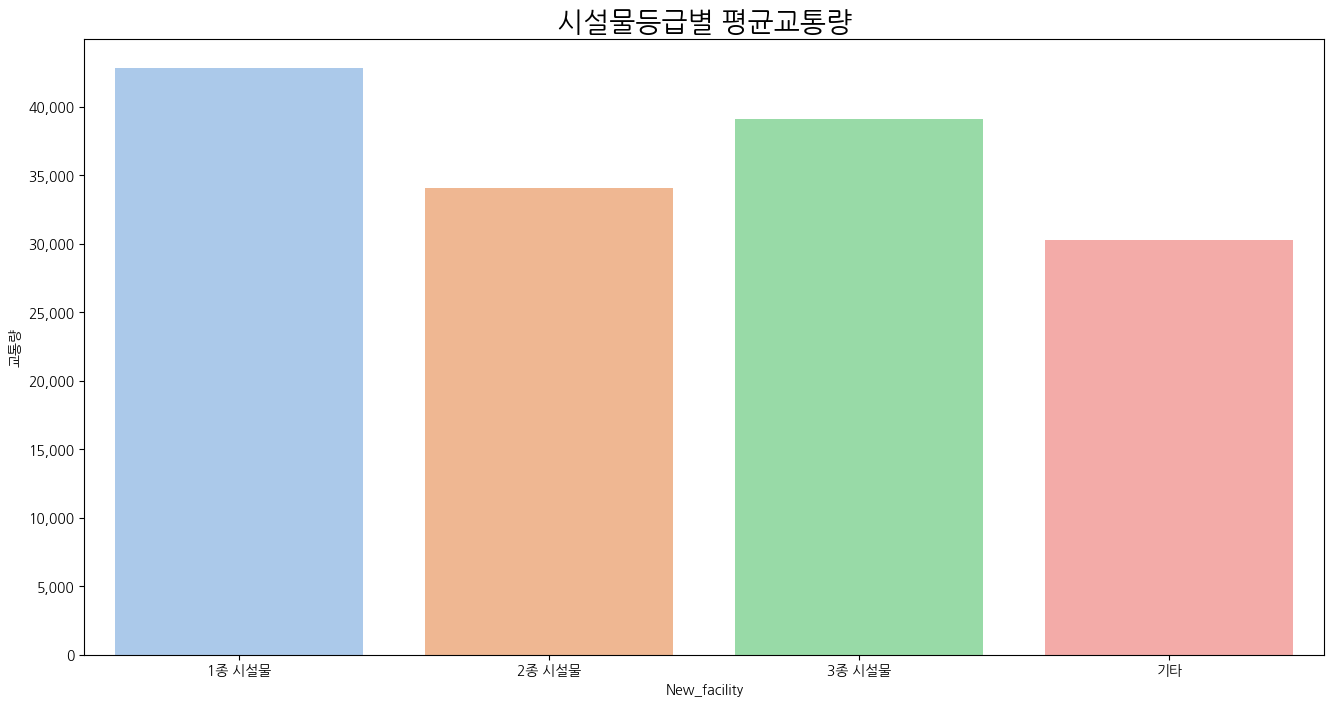

In [18]:
# 시설물등급에 따른 교통량평균 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_facility', y = '교통량', palette = 'pastel', data = mean_facility)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('시설물등급별 평균교통량', fontsize = 20)
plt.show()

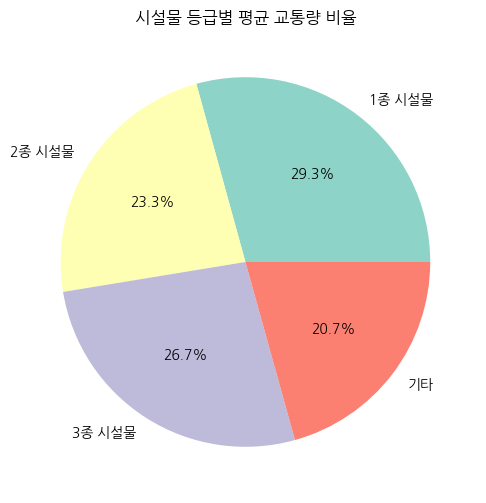

In [19]:
plt.figure(figsize = (8, 6))
plt.pie(mean_facility['교통량'], labels = mean_facility['New_facility'], autopct='%1.1f%%')
plt.title('시설물 등급별 평균 교통량 비율')
plt.show()

## 복합그래프

C:\Users\chunc\AppData\Local\Temp\ipykernel_66060\2920375096.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


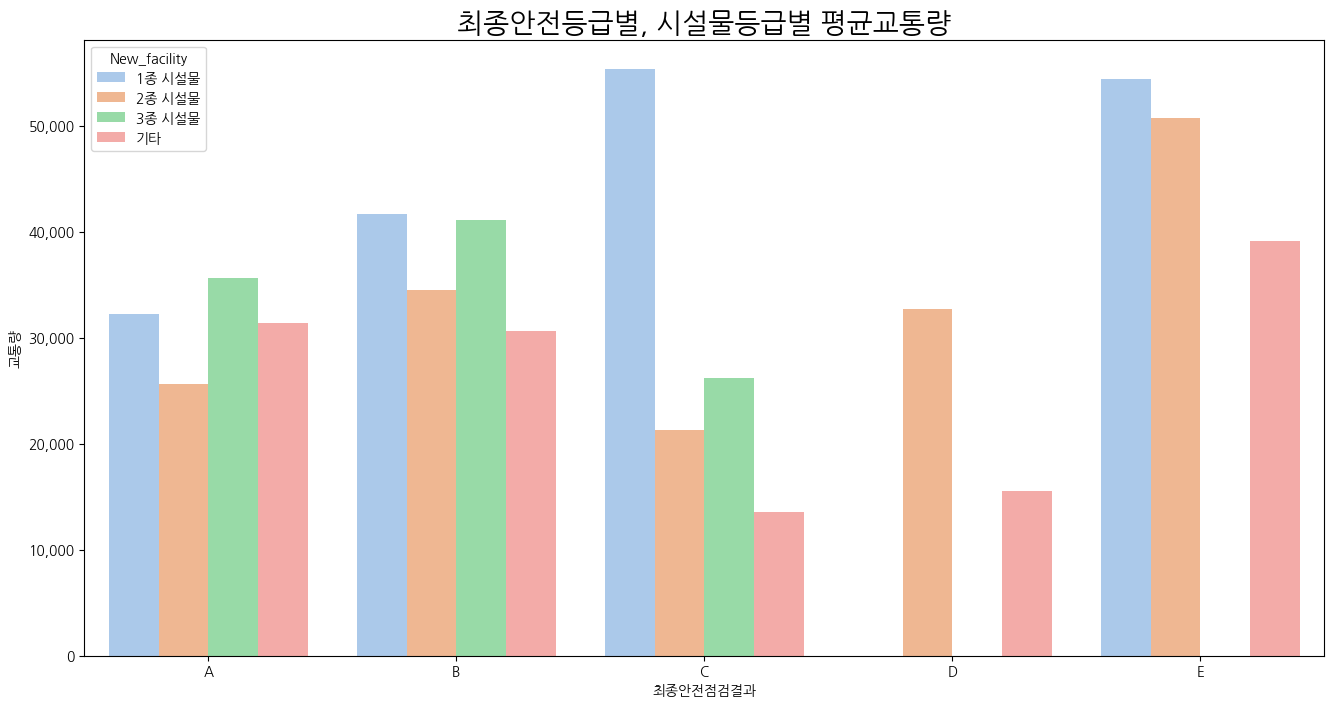

In [20]:
# 최종안전등급별, 시설물등급별 평균교통량 확인
plt.figure(figsize = (16, 8))
group_name = ['A', 'B', 'C', 'D', 'E']
sns.barplot(x = '최종안전점검결과', y = '교통량', hue = 'New_facility', palette = 'pastel', data = df, order = group_name,
            errorbar = None, hue_order = ['1종 시설물', '2종 시설물', '3종 시설물', '기타'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('최종안전등급별, 시설물등급별 평균교통량', fontsize = 20)
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E')])

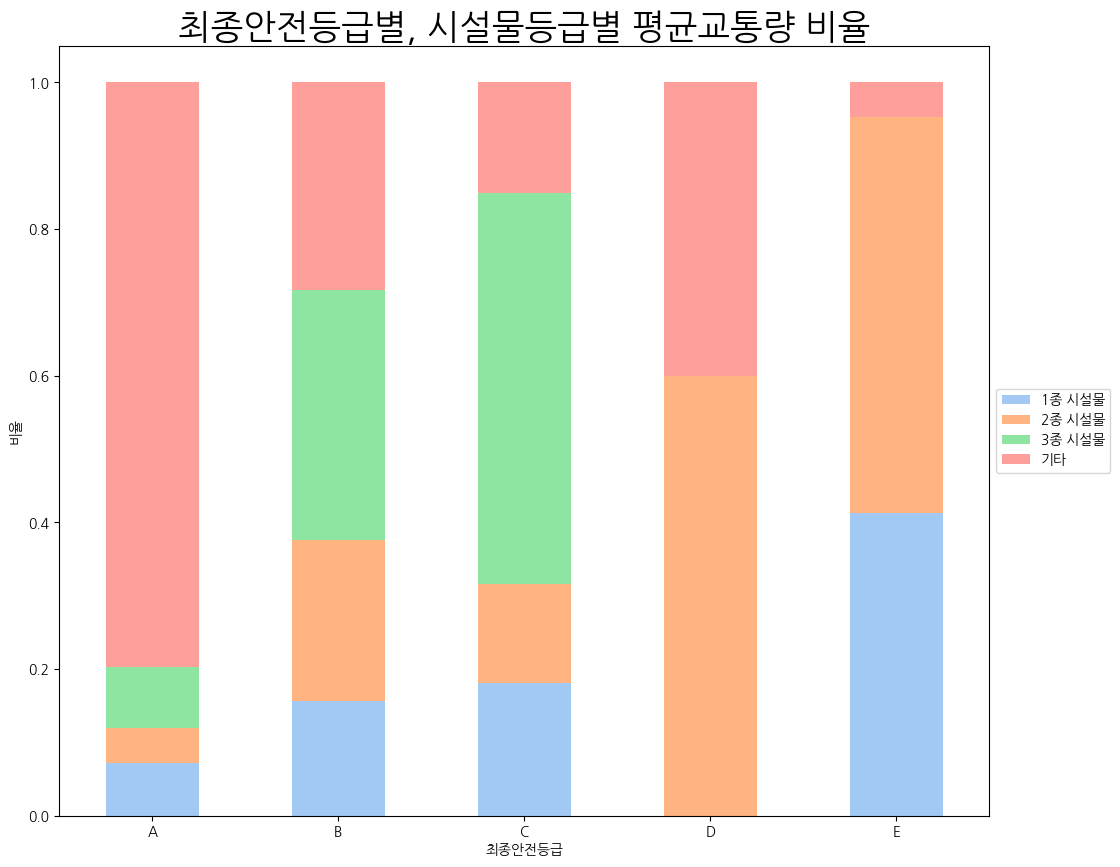

In [21]:
# 최종안전등급별, 시설물등급별 평균교통량 비율
result = df.groupby(['최종안전점검결과', 'New_facility'])['교통량'].count().unstack().apply(lambda x: x / x.sum(), axis=1)
sns.set_palette("pastel")
result.plot(kind = 'bar', stacked = True, figsize = (12,10))
plt.title('최종안전등급별, 시설물등급별 평균교통량 비율', fontsize = 25)
plt.xlabel('최종안전등급')
plt.ylabel('비율')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xticks(rotation = 0)

### 최종안전등급별, 시설물등급별 평균교통량 비율 결과해석?
* A등급인데도 시설물 등급이 기타인 교량들의 교통량이 많다.
* D,E등급의 교량인데 시설물 등급이 1,2종인 교량들의 교통량이 많다. 

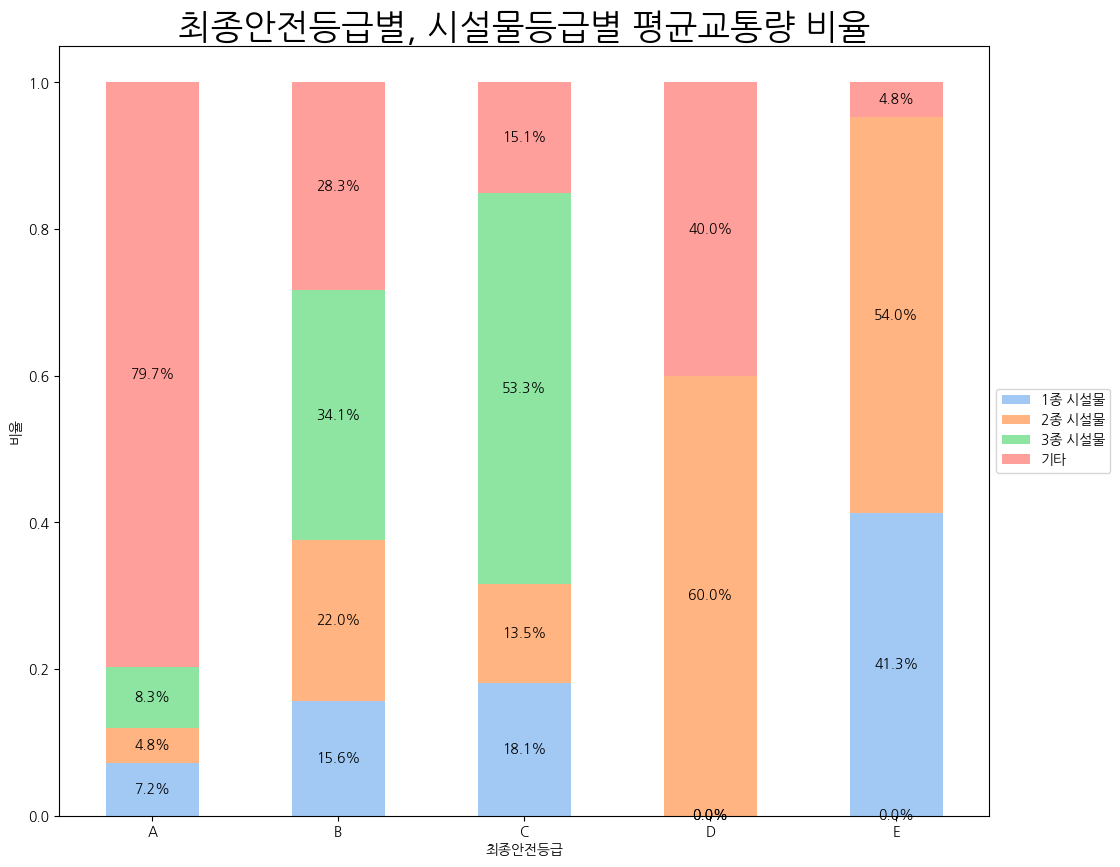

In [22]:
# 비율의 수치를 추가했을때
result = df.groupby(['최종안전점검결과', 'New_facility'])['교통량'].count().unstack().apply(lambda x: x / x.sum(), axis=1)

sns.set_palette("pastel")
ax = result.plot(kind='bar', stacked=True, figsize=(12, 10))
plt.title('최종안전등급별, 시설물등급별 평균교통량 비율', fontsize=25)
plt.xlabel('최종안전등급')
plt.ylabel('비율')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=0)

# annotation 추가
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(height*100)+'%', xy=(left+width/2, bottom+height/2), ha = 'center', va = 'center')
plt.sca(ax)

plt.show()

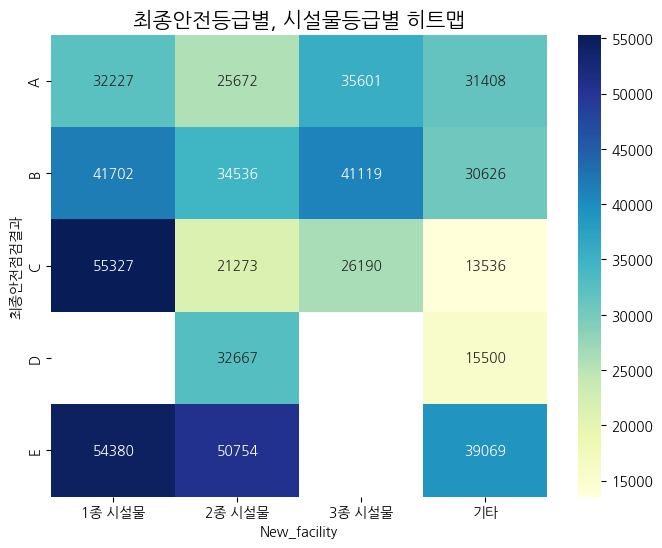

In [23]:
# 최종안전등급별, 시설물등급별, 평균교통량 히트맵 그리기
pivot = df.pivot_table(index = '최종안전점검결과', columns = 'New_facility', values = '교통량')

plt.figure(figsize = (8, 6))
sns.heatmap(pivot, annot = True, fmt = '.0f', cmap = 'YlGnBu')
plt.title('최종안전등급별, 시설물등급별 히트맵', fontsize = 15)
plt.xlabel('New_facility')
plt.ylabel('최종안전점검결과')
plt.show()

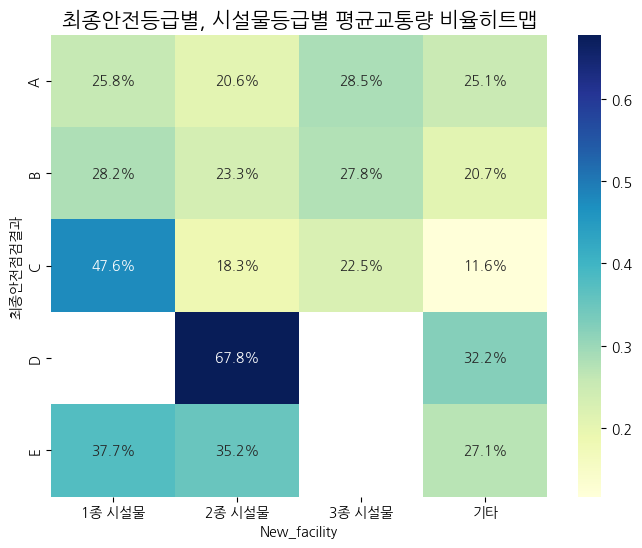

In [62]:
# 최종안전등급별, 시설물등급별, 평균교통량 비율히트맵 
pivot = df.pivot_table(index='최종안전점검결과', columns='New_facility', values='교통량')

# 비율로 변환
total_counts = pivot.sum(axis=1)
pivot_ratio = pivot.div(total_counts, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_ratio, annot=True, fmt='.1%', cmap='YlGnBu')
plt.title('최종안전등급별, 시설물등급별 평균교통량 비율히트맵', fontsize=15)
plt.xlabel('New_facility')
plt.ylabel('최종안전점검결과')
plt.show()

### 최종안전등급별, 시설물등급별, 평균교통량 히트맵 결과해석
* 시각적으로 안전등급별, 시설물등급별로 어떤 등급의 교량에 교통량이 많은지 파악이 가능

C:\Users\chunc\AppData\Local\Temp\ipykernel_66060\2703217400.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


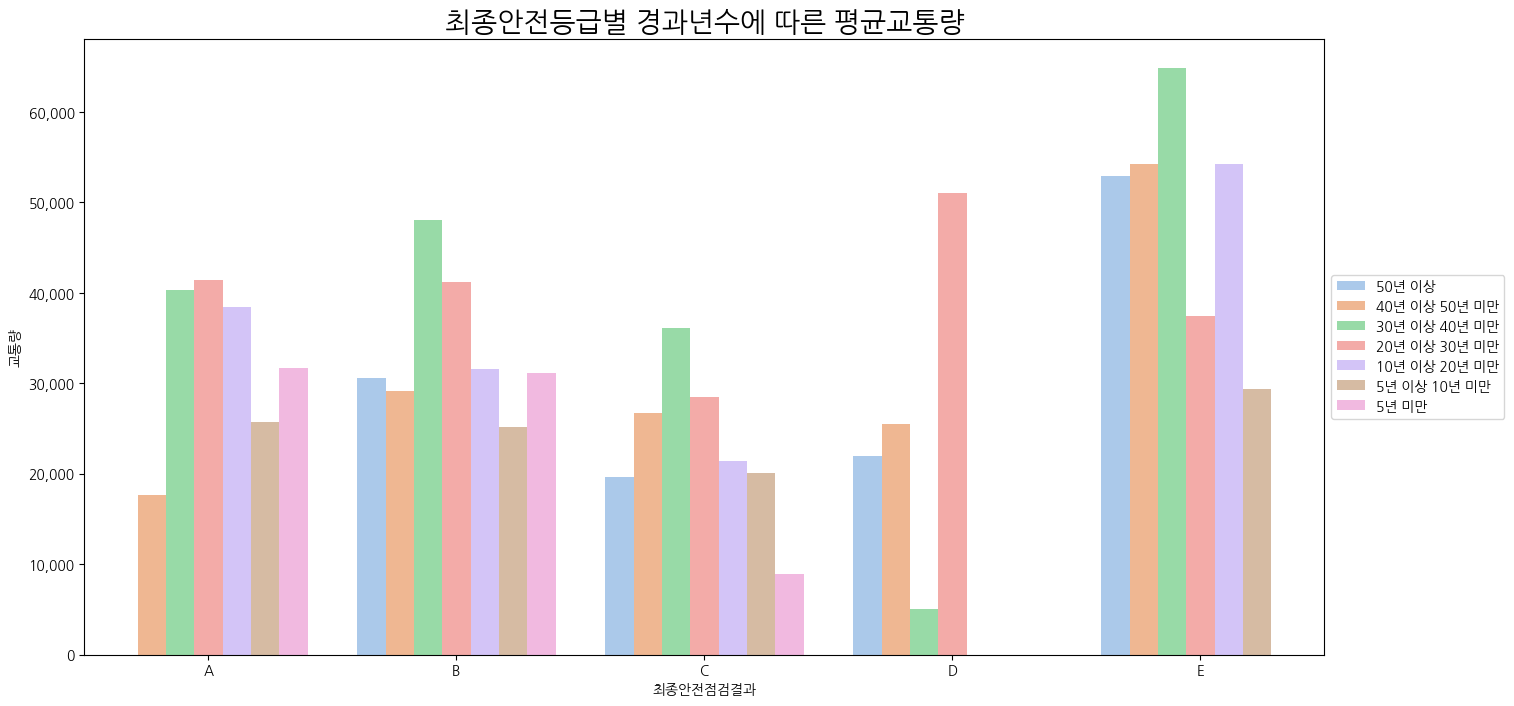

In [25]:
# 안전등급, 경과년수별에 따른 평균교통량 그래프 확인
plt.figure(figsize = (16, 8))
group_name = ['A', 'B', 'C', 'D', 'E']
sns.barplot(x = '최종안전점검결과', y = '교통량', hue = 'Cum_year', palette = 'pastel', data = df, order = group_name, errorbar = None,
            hue_order = ['50년 이상', '40년 이상 50년 미만', '30년 이상 40년 미만', '20년 이상 30년 미만',
                         '10년 이상 20년 미만', '5년 이상 10년 미만', '5년 미만'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('최종안전등급별 경과년수에 따른 평균교통량', fontsize = 20)
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E')])

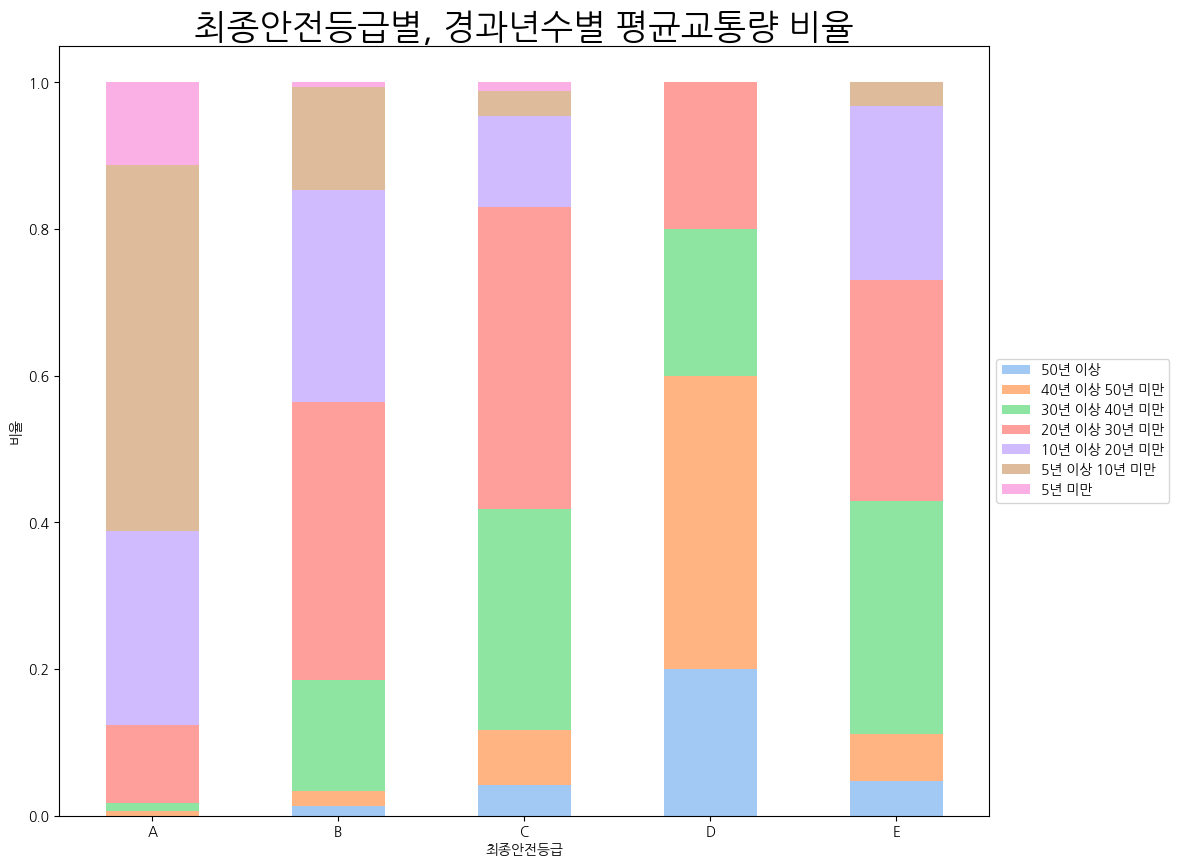

In [26]:
# 최종안전등급별, 경과년수별 평균교통량 비율
result = df.groupby(['최종안전점검결과', 'Cum_year'])['교통량'].count().unstack().apply(lambda x: x / x.sum(), axis=1)
order = ['50년 이상', '40년 이상 50년 미만', '30년 이상 40년 미만', '20년 이상 30년 미만',
                         '10년 이상 20년 미만', '5년 이상 10년 미만', '5년 미만']
result = result.reindex(columns = order)
result.plot(kind = 'bar', stacked = True, figsize = (12,10))
plt.title('최종안전등급별, 경과년수별 평균교통량 비율', fontsize = 25)
plt.xlabel('최종안전등급')
plt.ylabel('비율')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xticks(rotation = 0)

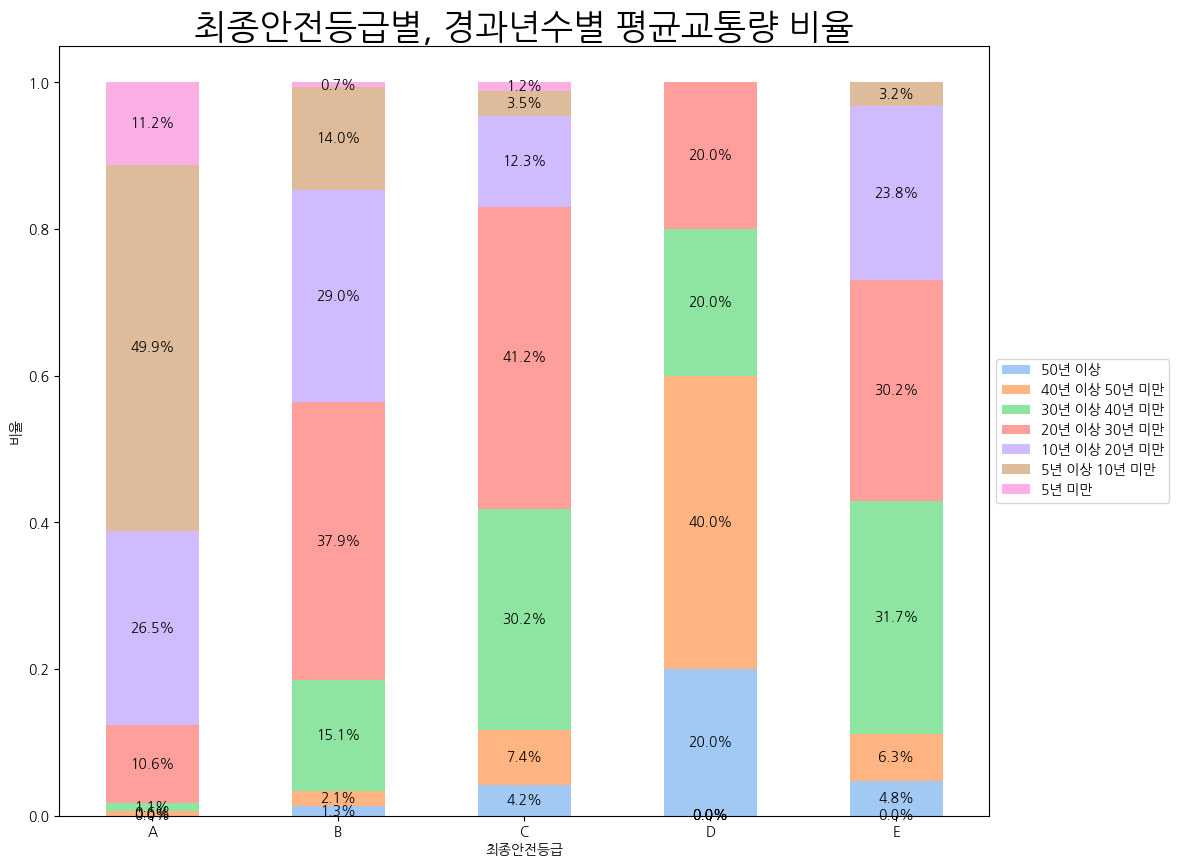

In [27]:
# 비율수치 표현
result = df.groupby(['최종안전점검결과', 'Cum_year'])['교통량'].count().unstack().apply(lambda x: x / x.sum(), axis=1)
order = ['50년 이상', '40년 이상 50년 미만', '30년 이상 40년 미만', '20년 이상 30년 미만',
                         '10년 이상 20년 미만', '5년 이상 10년 미만', '5년 미만']
result = result.reindex(columns = order)
ax = result.plot(kind = 'bar', stacked = True, figsize = (12,10))
plt.title('최종안전등급별, 경과년수별 평균교통량 비율', fontsize = 25)
plt.xlabel('최종안전등급')
plt.ylabel('비율')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xticks(rotation = 0)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(height*100)+'%', xy=(left+width/2, bottom+height/2), ha = 'center', va = 'center')
plt.sca(ax)

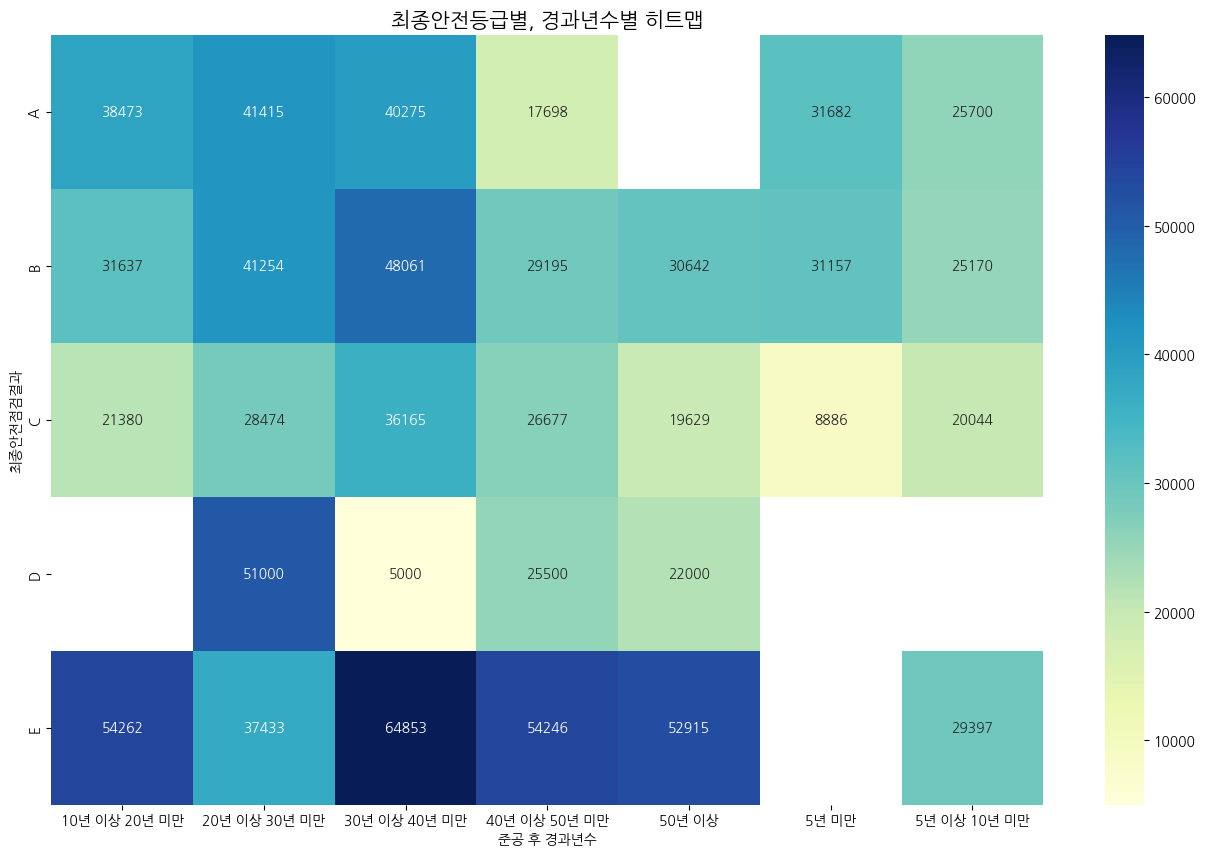

In [28]:
# 최종안전등급별, 경과년수, 평균교통량 히트맵 그리기
pivot = df.pivot_table(index = '최종안전점검결과', columns = 'Cum_year', values = '교통량')

plt.figure(figsize=(16, 10))
sns.heatmap(pivot, annot = True, fmt = '.0f', cmap = 'YlGnBu')
plt.title('최종안전등급별, 경과년수별 히트맵', fontsize = 15)
plt.xlabel('준공 후 경과년수')
plt.ylabel('최종안전점검결과')
plt.xticks(rotation = 0)
plt.show()

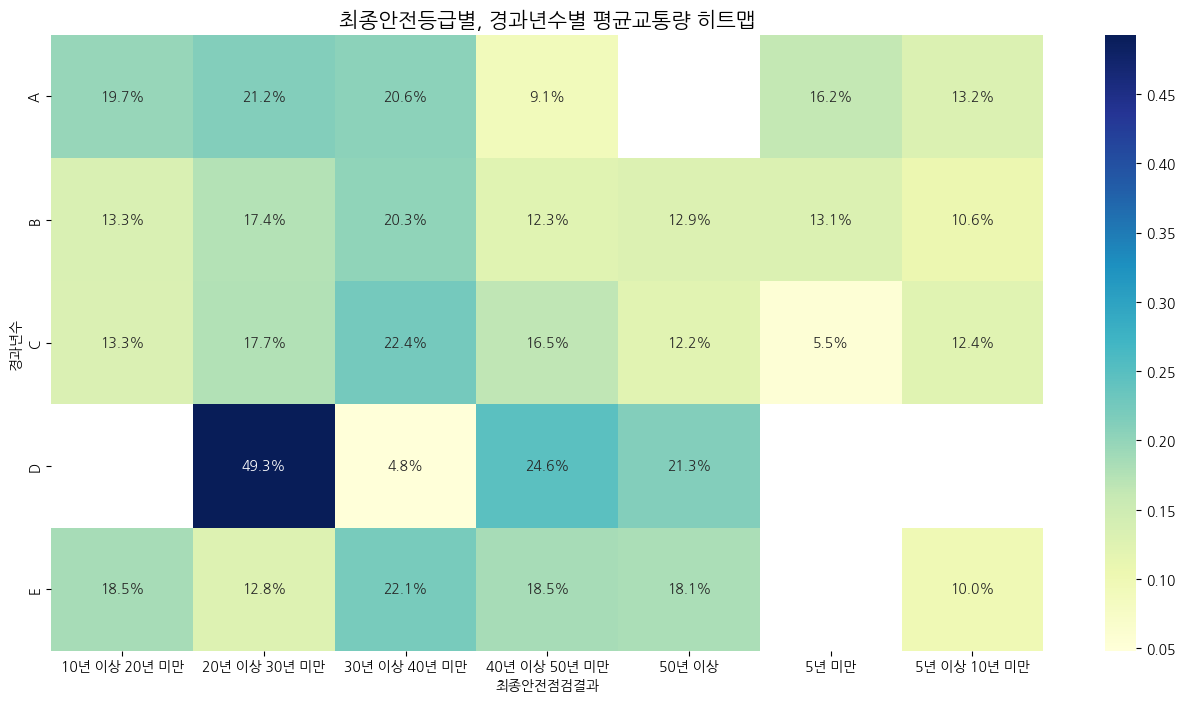

In [29]:
# 최종안전등급별, 경과년수, 평균교통량 비율히트맵
pivot = df.pivot_table(index='최종안전점검결과', columns='Cum_year', values='교통량')

# 비율로 변환
total_counts = pivot.sum(axis=1)
pivot_ratio = pivot.div(total_counts, axis=0)

plt.figure(figsize=(16, 8))
sns.heatmap(pivot_ratio, annot=True, fmt='.1%', cmap='YlGnBu')
plt.title('최종안전등급별, 경과년수별 평균교통량 히트맵', fontsize=15)
plt.xlabel('최종안전점검결과')
plt.ylabel('경과년수')
plt.xticks(rotation = 0)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_66060\4196947379.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


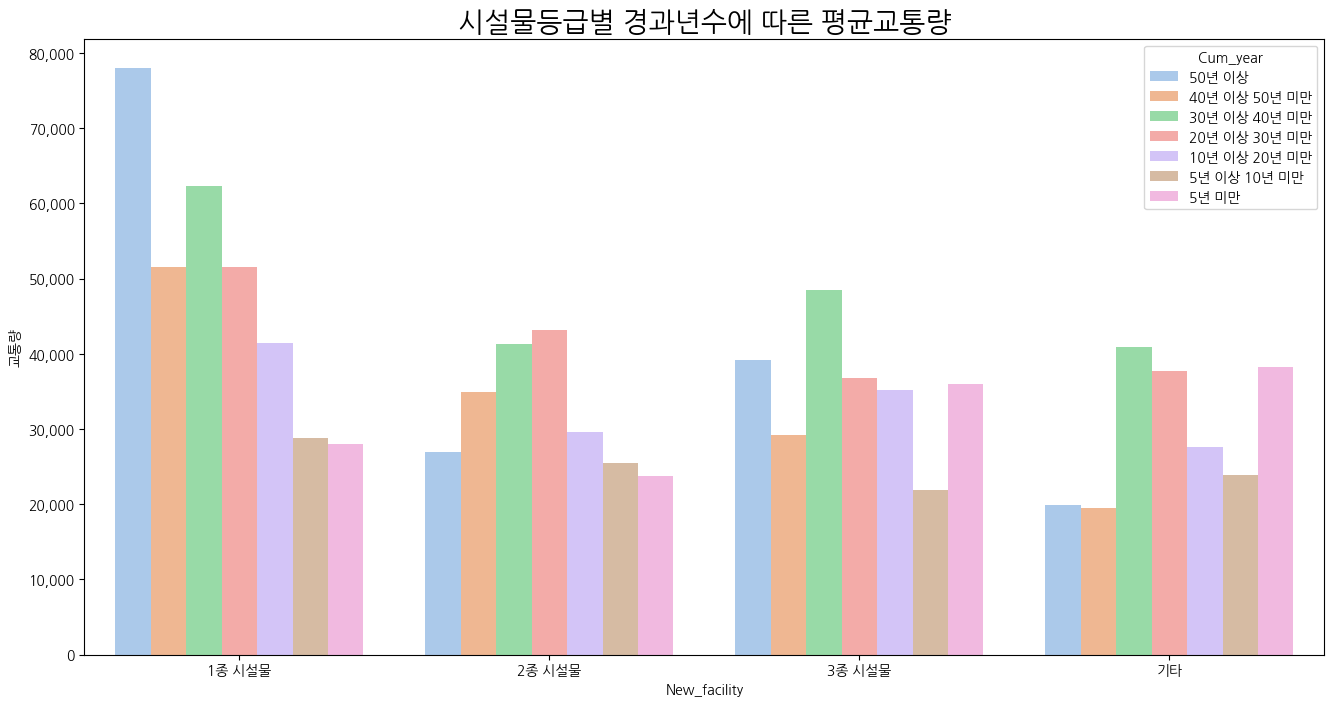

In [30]:
# 시설물등급별, 경과년수별에 따른 평균교통량 그래프 확인
plt.figure(figsize = (16, 8))
group_name = ['1종 시설물', '2종 시설물', '3종 시설물', '기타']
sns.barplot(x = 'New_facility', y = '교통량', hue = 'Cum_year', palette = 'pastel', data = df, order = group_name, errorbar = None,
            hue_order = ['50년 이상', '40년 이상 50년 미만', '30년 이상 40년 미만', '20년 이상 30년 미만',
                         '10년 이상 20년 미만', '5년 이상 10년 미만', '5년 미만'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('시설물등급별 경과년수에 따른 평균교통량', fontsize = 20)
plt.show()

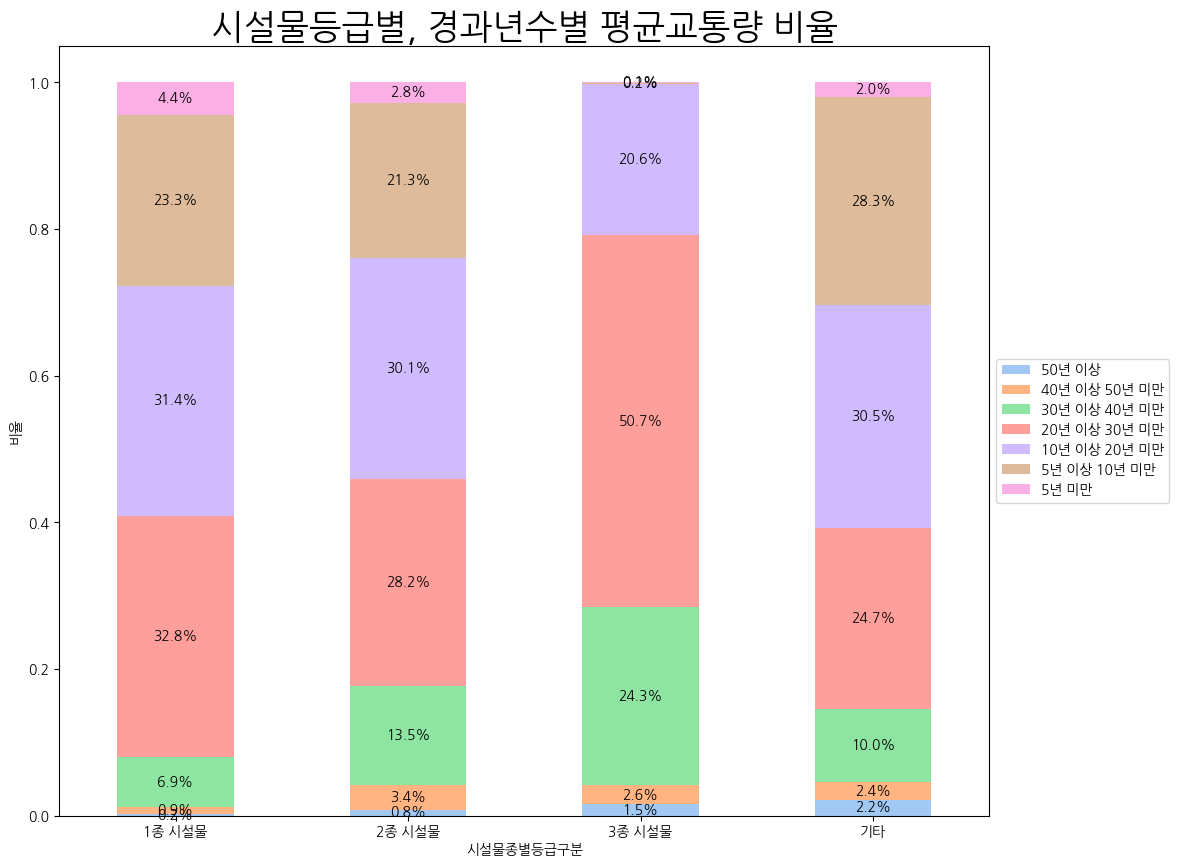

In [31]:
# 시설물등급별, 경과년수별 평균교통량 비율
result = df.groupby(['New_facility', 'Cum_year'])['교통량'].count().unstack().apply(lambda x: x / x.sum(), axis=1)
order = ['50년 이상', '40년 이상 50년 미만', '30년 이상 40년 미만', '20년 이상 30년 미만',
                         '10년 이상 20년 미만', '5년 이상 10년 미만', '5년 미만']
result = result.reindex(columns = order)
ax = result.plot(kind = 'bar', stacked = True, figsize = (12,10))
plt.title('시설물등급별, 경과년수별 평균교통량 비율', fontsize = 25)
plt.xlabel('시설물종별등급구분')
plt.ylabel('비율')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xticks(rotation = 0)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(height*100)+'%', xy=(left+width/2, bottom+height/2), ha = 'center', va = 'center')
plt.sca(ax)
plt.show()

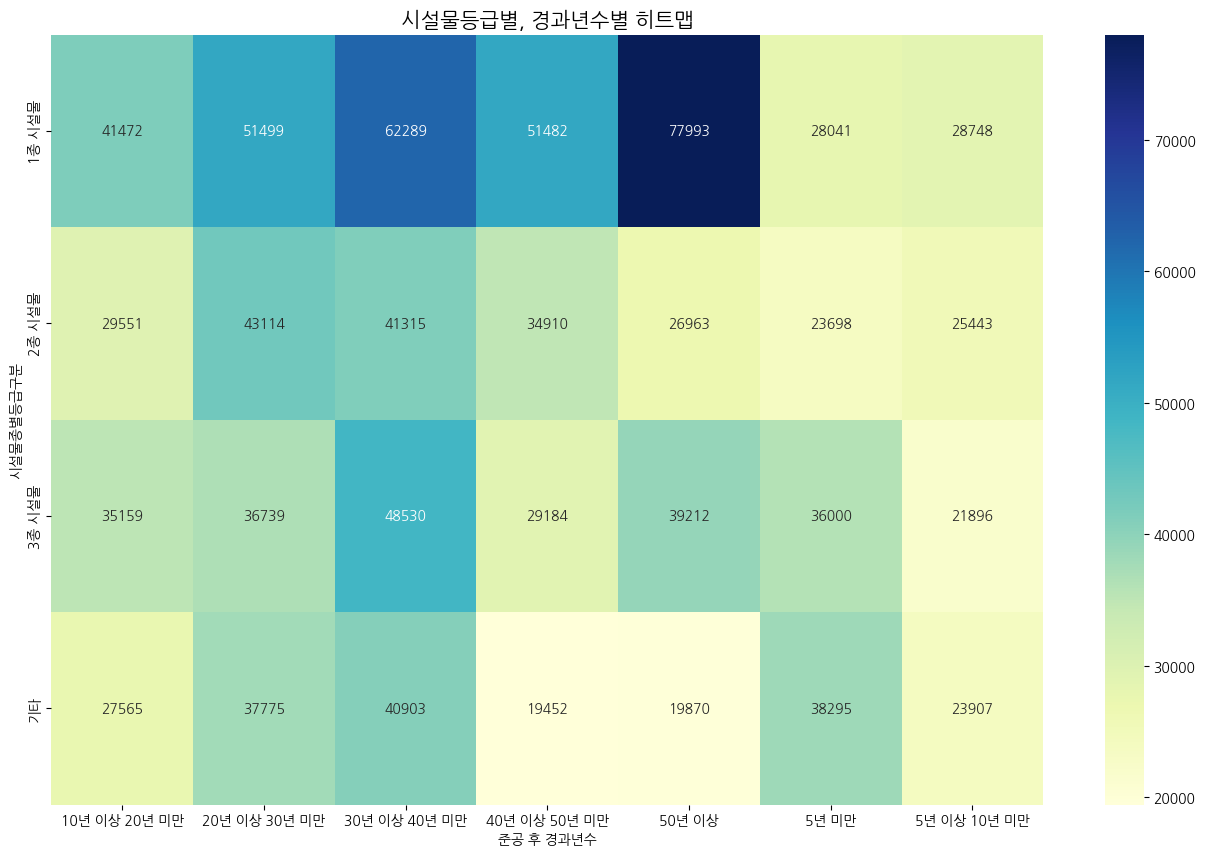

In [32]:
# 시설물등급별, 경과년수별에 따른 평균교통량 히트맵 그리기
pivot = df.pivot_table(index = 'New_facility', columns = 'Cum_year', values = '교통량')

plt.figure(figsize=(16, 10))
sns.heatmap(pivot, annot = True, fmt = '.0f', cmap = 'YlGnBu')
plt.title('시설물등급별, 경과년수별 히트맵', fontsize = 15)
plt.xlabel('준공 후 경과년수')
plt.ylabel('시설물종별등급구분')
plt.xticks(rotation = 0)
plt.show()

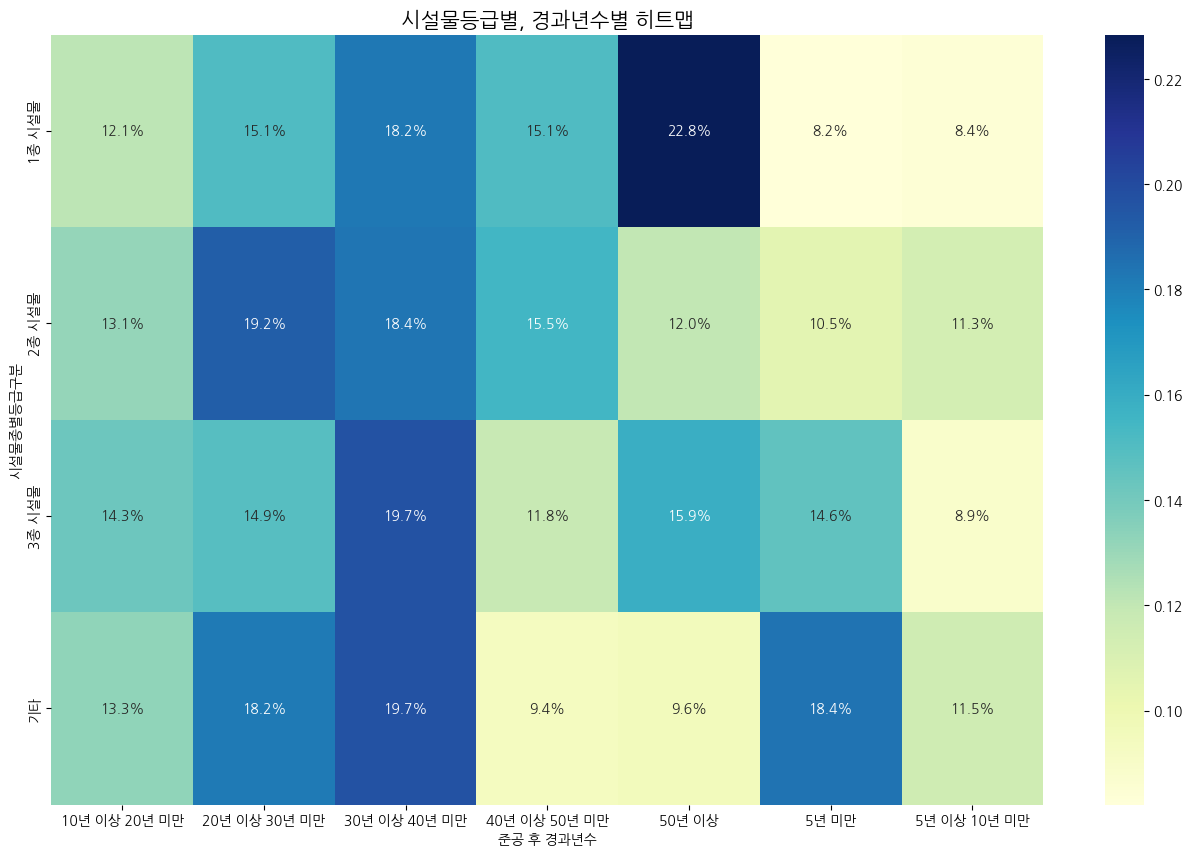

In [33]:
# 시설물등급별, 경과년수별에 따른 평균교통량 히트맵 그리기
pivot = df.pivot_table(index = 'New_facility', columns = 'Cum_year', values = '교통량')
total_counts = pivot.sum(axis=1)
pivot_ratio = pivot.div(total_counts, axis=0)
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_ratio, annot = True, fmt='.1%', cmap = 'YlGnBu')
plt.title('시설물등급별, 경과년수별 히트맵', fontsize = 15)
plt.xlabel('준공 후 경과년수')
plt.ylabel('시설물종별등급구분')
plt.xticks(rotation = 0)
plt.show()

In [34]:
# 설계하중별, 안전등급별 평균교통량
# 설계하중별 교통량
def category_weight(weight):
    if weight == 'DB-24':
        return '1등교'
    elif weight == 'DB-18':
        return '2등교'
    elif weight == 'DB-13.5':
        return '3등교'
    else:
        return '기타'

In [35]:
df['New_Weight'] = df['설계활하중'].apply(lambda x: category_weight(x))

C:\Users\chunc\AppData\Local\Temp\ipykernel_66060\3908436725.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


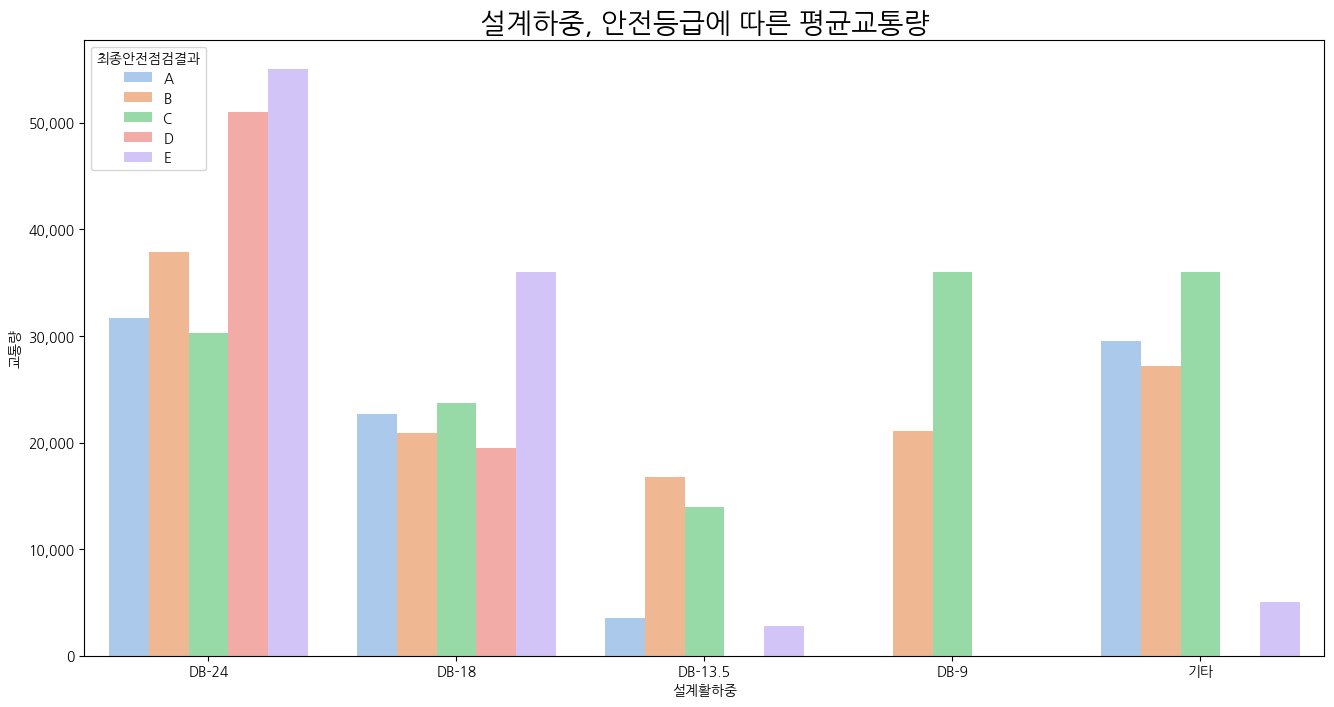

In [36]:
# 설계하중, 안전등급에 따른 평균교통량 그래프 확인
plt.figure(figsize = (16, 8))
group_name = ['DB-24', 'DB-18', 'DB-13.5', 'DB-9', '기타']
sns.barplot(x = '설계활하중', y = '교통량', hue = '최종안전점검결과', palette = 'pastel', data = df, order = group_name, errorbar = None,
            hue_order = ['A', 'B', 'C', 'D', 'E'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('설계하중, 안전등급에 따른 평균교통량', fontsize = 20)
plt.show()

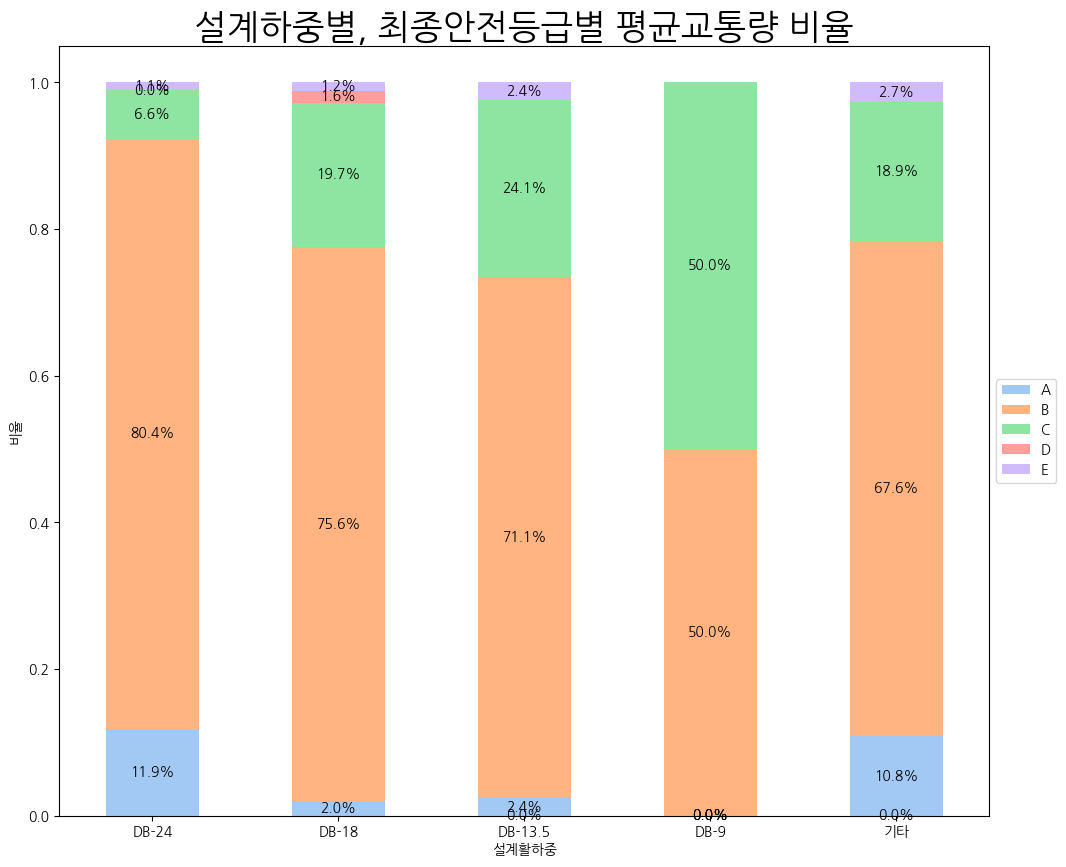

In [37]:
# 설계하중별, 최종안전등급별 평균교통량 비율
result = df.groupby(['설계활하중', '최종안전점검결과'])['교통량'].count().unstack().apply(lambda x: x / x.sum(), axis=1)
order = ['DB-24', 'DB-18', 'DB-13.5', 'DB-9', '기타']
result = result.reindex(index = order)

ax = result.plot(kind = 'bar', stacked = True, figsize = (12,10))
plt.title('설계하중별, 최종안전등급별 평균교통량 비율', fontsize = 25)
plt.xlabel('설계활하중')
plt.ylabel('비율')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xticks(rotation = 0)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(height*100)+'%', xy=(left+width/2, bottom+height/2), ha = 'center', va = 'center')
plt.sca(ax)
plt.show()

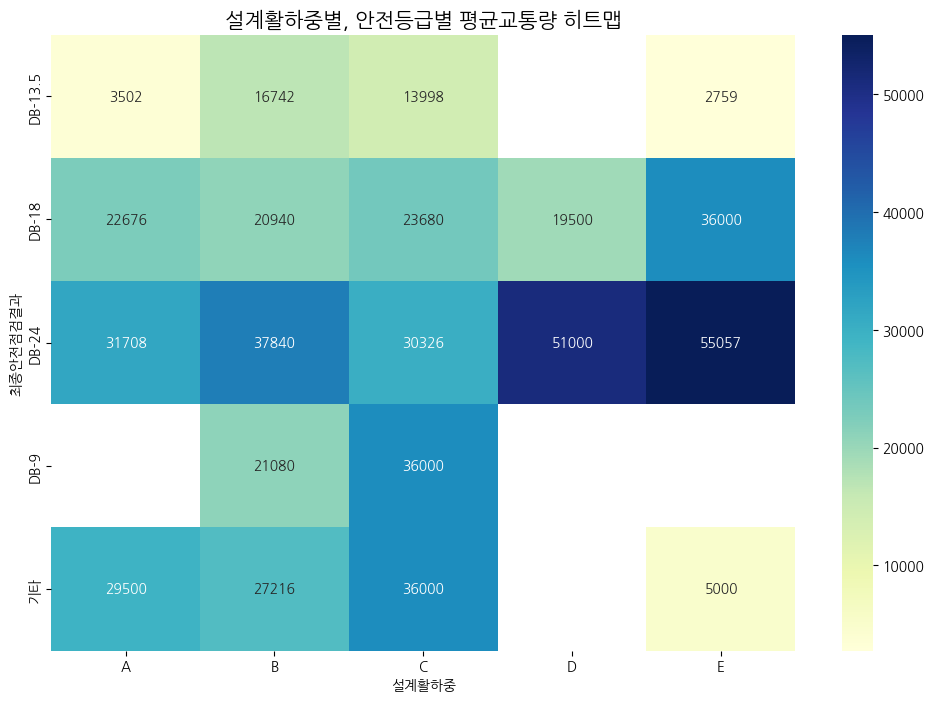

In [38]:
# 설계하중, 안전등급에 따른 평균교통량 히트맵 그리기
pivot = df.pivot_table(index='설계활하중', columns = '최종안전점검결과', values = '교통량')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap = 'YlGnBu')
plt.title('설계활하중별, 안전등급별 평균교통량 히트맵', fontsize = 15)
plt.xlabel('설계활하중')
plt.ylabel('최종안전점검결과')
plt.xticks(rotation = 0)
plt.show()

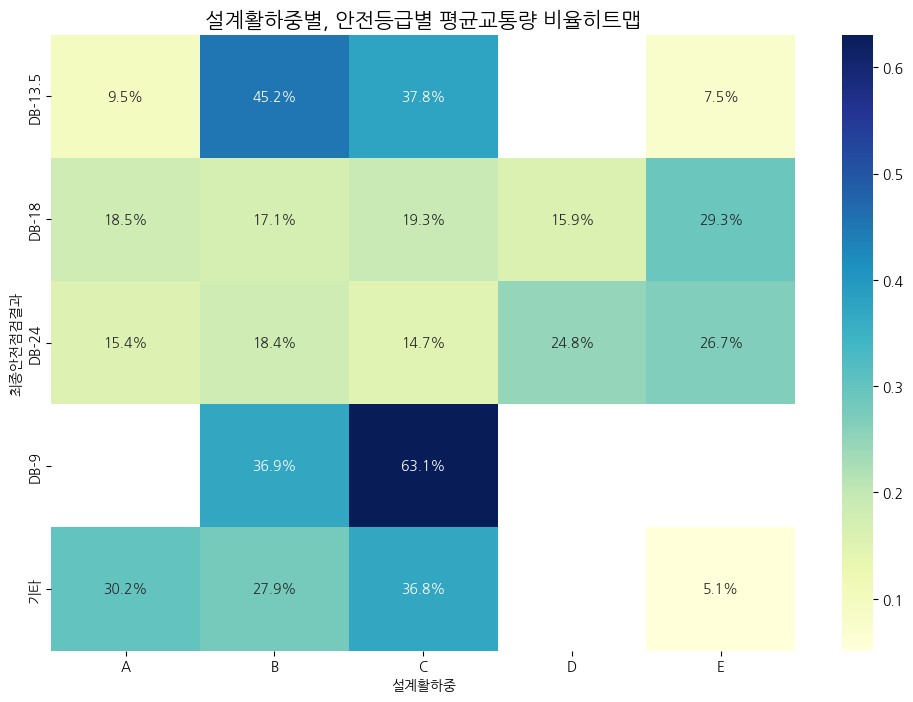

In [60]:
# 설계하중, 안전등급에 따른 평균교통량 히트맵 그리기
pivot = df.pivot_table(index='설계활하중', columns = '최종안전점검결과', values = '교통량')
total_counts = pivot.sum(axis=1)
pivot_ratio = pivot.div(total_counts, axis=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_ratio, annot=True, fmt='.1%', cmap = 'YlGnBu')
plt.title('설계활하중별, 안전등급별 평균교통량 비율히트맵', fontsize = 15)
plt.xlabel('설계활하중')
plt.ylabel('최종안전점검결과')
plt.xticks(rotation = 0)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_66060\2537284266.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


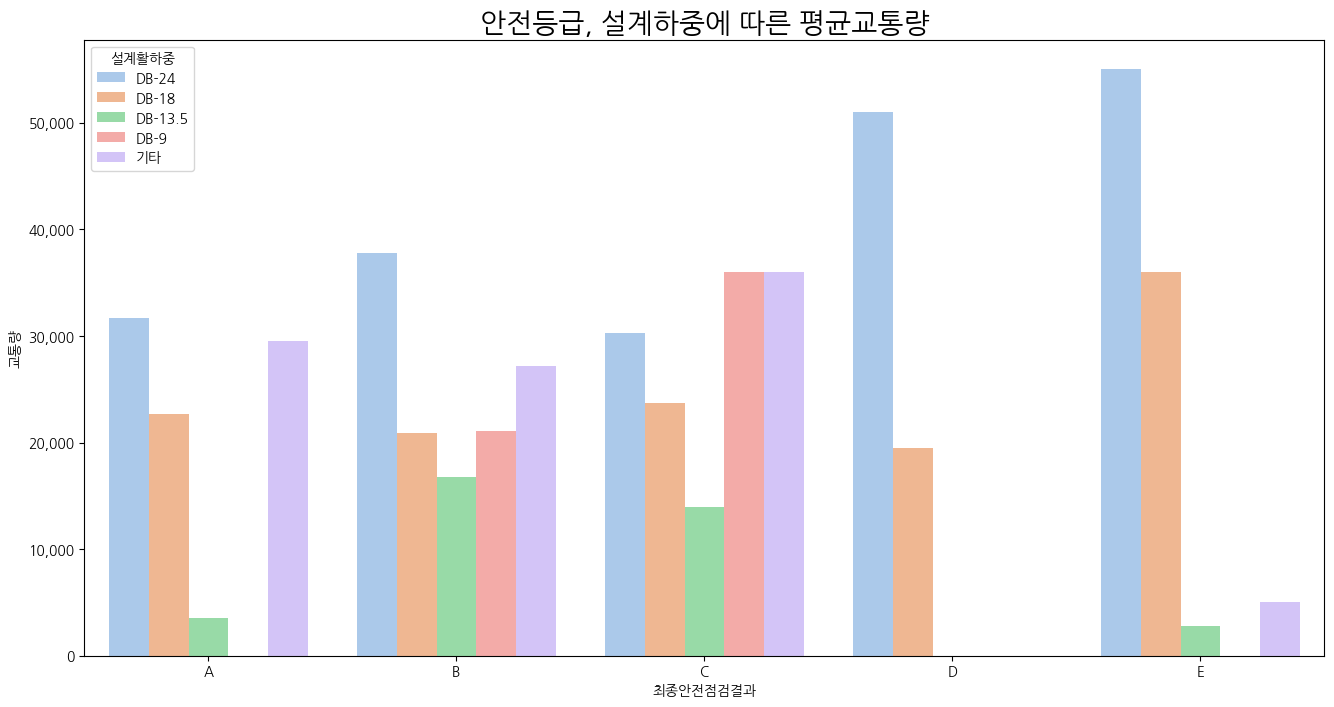

In [40]:
# 최종안전등급, 설계하중에 따른 평균교통량 그래프 확인
plt.figure(figsize = (16, 8))
group_name = ['A', 'B', 'C', 'D', 'E']
sns.barplot(x = '최종안전점검결과', y = '교통량', hue = '설계활하중', palette = 'pastel', data = df, order = group_name, errorbar = None,
            hue_order = ['DB-24', 'DB-18', 'DB-13.5', 'DB-9', '기타'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('안전등급, 설계하중에 따른 평균교통량', fontsize = 20)
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E')])

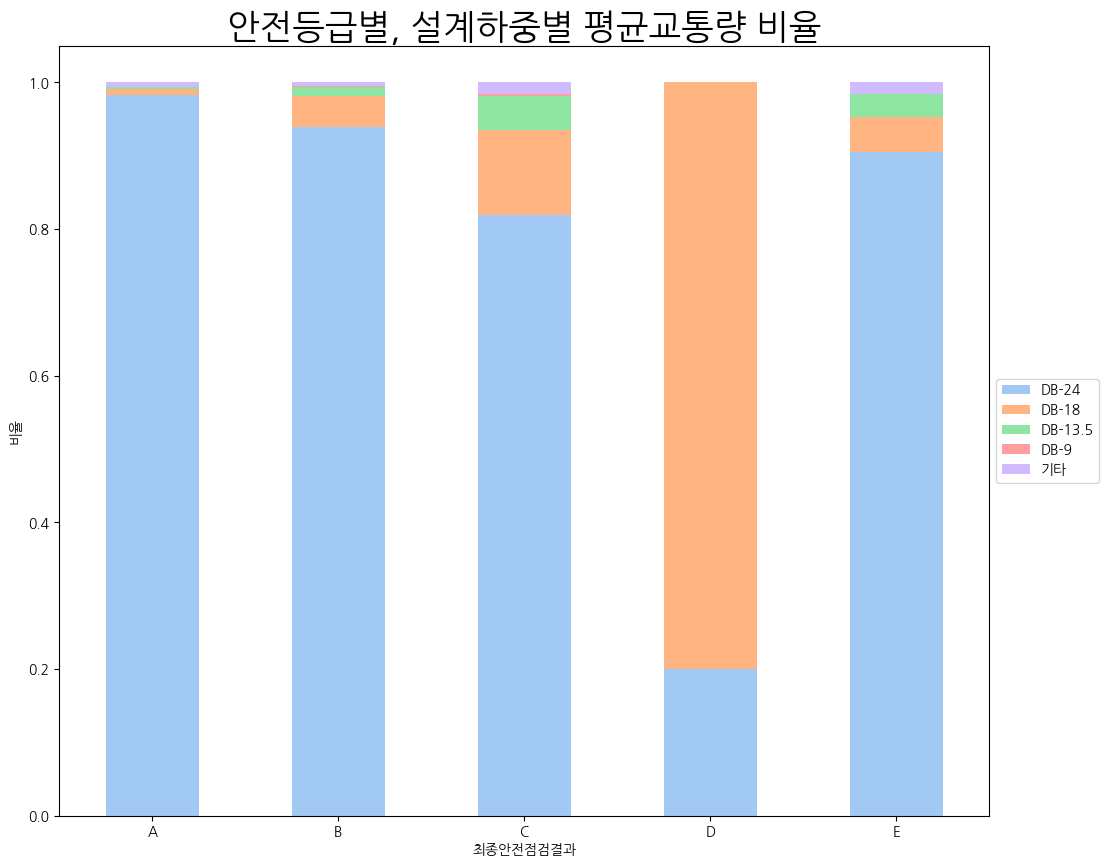

In [41]:
# 안전등급별, 설계하중별 평균교통량 비율
sns.set_palette("pastel")
result = df.groupby(['최종안전점검결과', '설계활하중'])['교통량'].count().unstack().apply(lambda x: x / x.sum(), axis=1)
order = ['DB-24', 'DB-18', 'DB-13.5', 'DB-9', '기타']
result = result.reindex(columns = order)
result.plot(kind = 'bar', stacked = True, figsize = (12,10))
plt.title('안전등급별, 설계하중별 평균교통량 비율', fontsize = 25)
plt.xlabel('최종안전점검결과')
plt.ylabel('비율')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xticks(rotation = 0)

### 안전등급별, 설계하중별 평균교통량 비율 결과해석
* (결측치 대체에 대해)어느정도 오차는 있겠지만 안전등급이 D,E로 분류된 교량중 설계하중 규모가 큰 DB-24와 DB-18가 차치하는 비중이 높다.

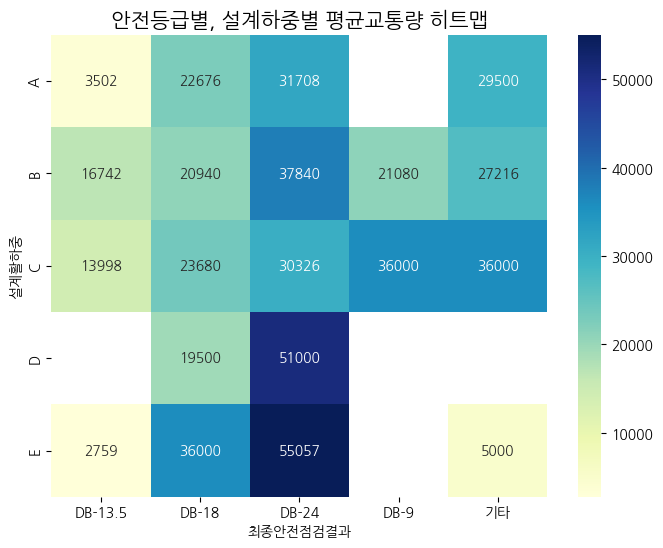

In [63]:
# 최종안전등급별, 설계하중별, 평균교통량 히트맵 그리기
pivot = df.pivot_table(index = '최종안전점검결과', columns = '설계활하중', values='교통량')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('안전등급별, 설계하중별 평균교통량 히트맵', fontsize = 15)
plt.xlabel('최종안전점검결과')
plt.ylabel('설계활하중')
plt.show()

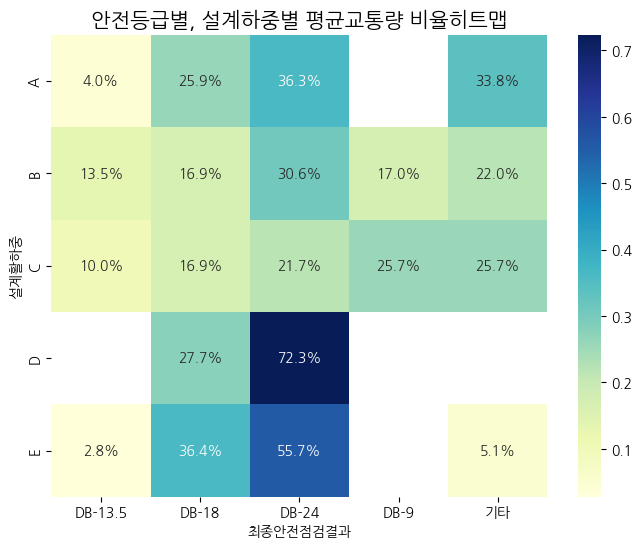

In [59]:
# 최종안전등급별, 설계하중별, 평균교통량 비율히트맵
pivot = df.pivot_table(index = '최종안전점검결과', columns = '설계활하중', values='교통량')
total_counts = pivot.sum(axis=1)
pivot_ratio = pivot.div(total_counts, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_ratio, annot=True, fmt='.1%', cmap='YlGnBu')
plt.title('안전등급별, 설계하중별 평균교통량 비율히트맵', fontsize = 15)
plt.xlabel('최종안전점검결과')
plt.ylabel('설계활하중')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_66060\362100778.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


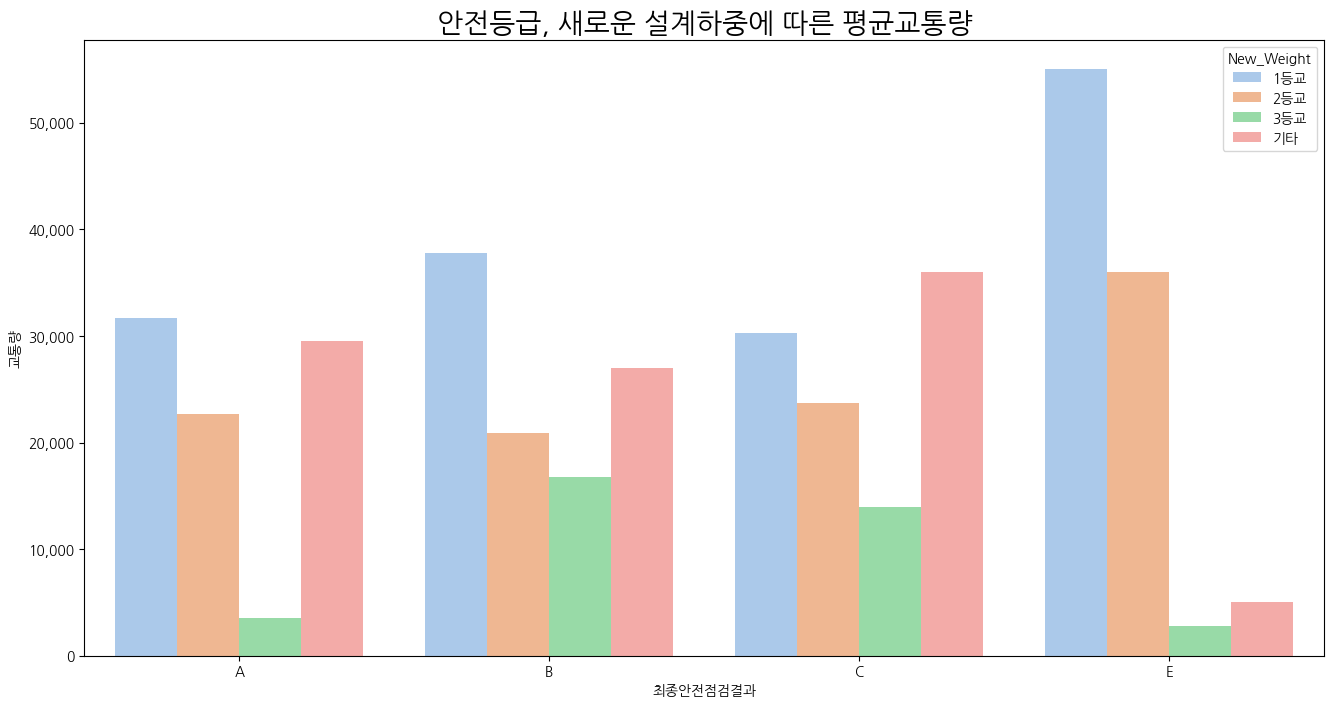

In [44]:
# 안전등급, 설계하중에 따른 평균교통량 그래프 확인
plt.figure(figsize = (16, 8))
group_name = ['A', 'B', 'C', 'E']
sns.barplot(x = '최종안전점검결과', y = '교통량', hue = 'New_Weight', palette = 'pastel', data = df, order = group_name, errorbar = None,
            hue_order = ['1등교', '2등교', '3등교', '기타'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('안전등급, 새로운 설계하중에 따른 평균교통량', fontsize = 20)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_66060\3983386881.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


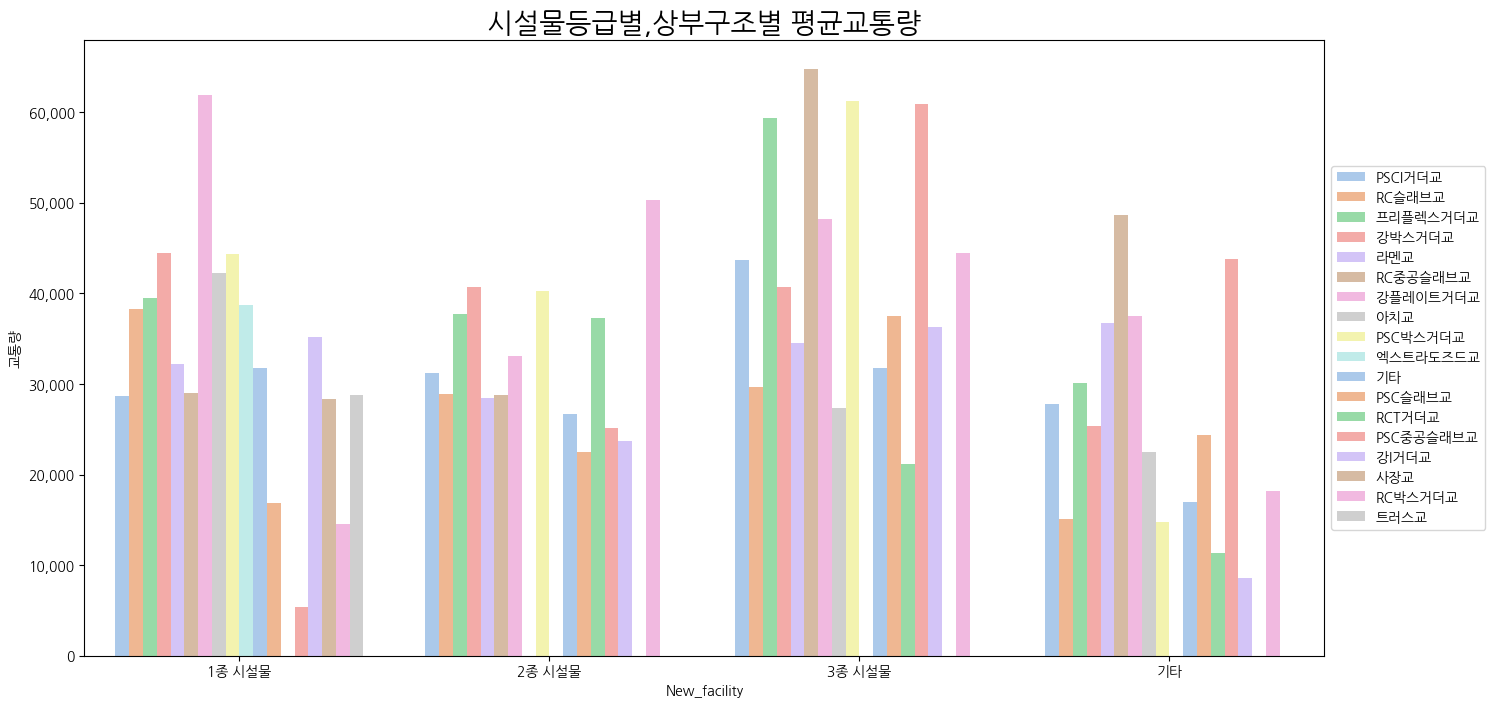

In [45]:
# 시설물등급별,상부구조별 평균교통량 확인
plt.figure(figsize = (16, 8))
group_name = ['1종 시설물', '2종 시설물', '3종 시설물', '기타']
sns.barplot(x = 'New_facility', y = '교통량', hue = '상부구조형식', palette = 'pastel', data = df, order = group_name,
            errorbar = None)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('시설물등급별,상부구조별 평균교통량', fontsize = 20)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, '1종 시설물'),
  Text(1, 0, '2종 시설물'),
  Text(2, 0, '3종 시설물'),
  Text(3, 0, '기타')])

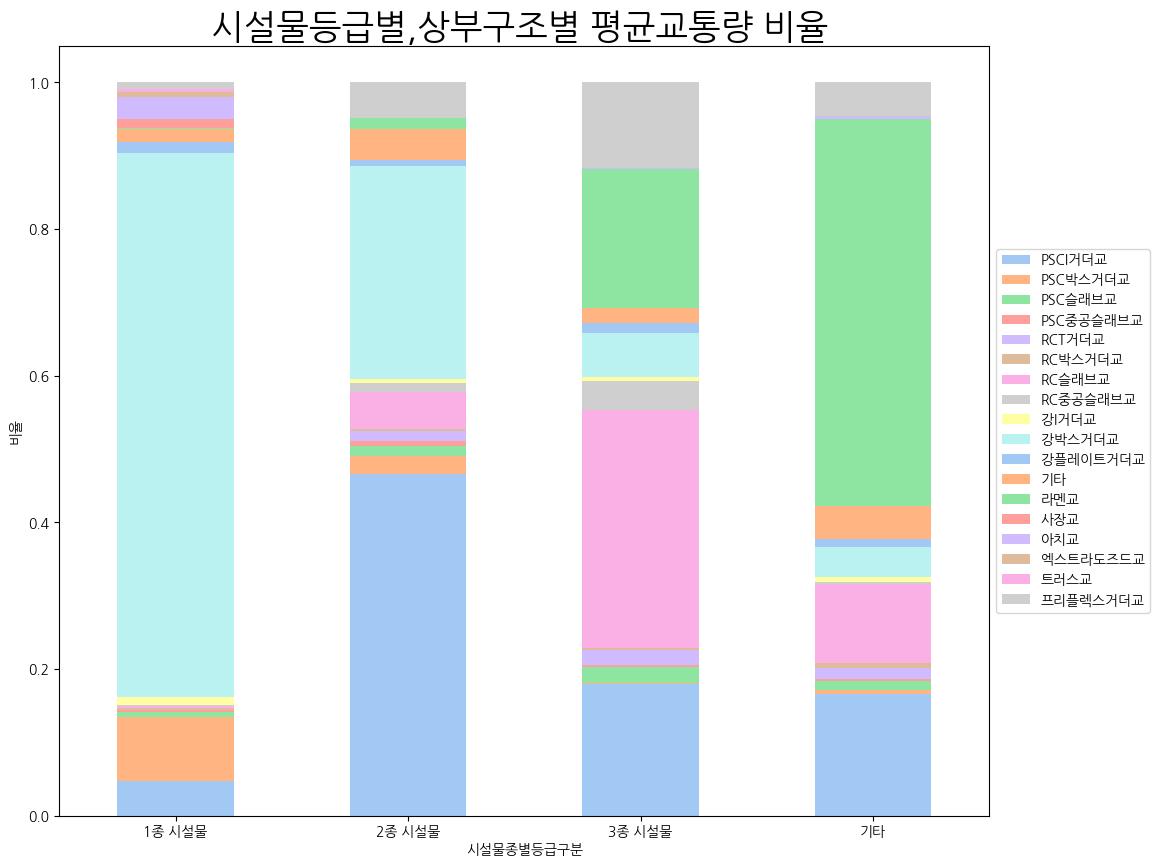

In [46]:
# 시설물등급별,상부구조별 평균교통량 비율 그래프
result = df.groupby(['New_facility', '상부구조형식'])['교통량'].count().unstack().apply(lambda x: x / x.sum(), axis=1)
sns.set_palette("pastel")
result.plot(kind = 'bar', stacked = True, figsize = (12,10))
plt.title('시설물등급별,상부구조별 평균교통량 비율 ', fontsize = 25)
plt.xlabel('시설물종별등급구분')
plt.ylabel('비율')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xticks(rotation = 0)

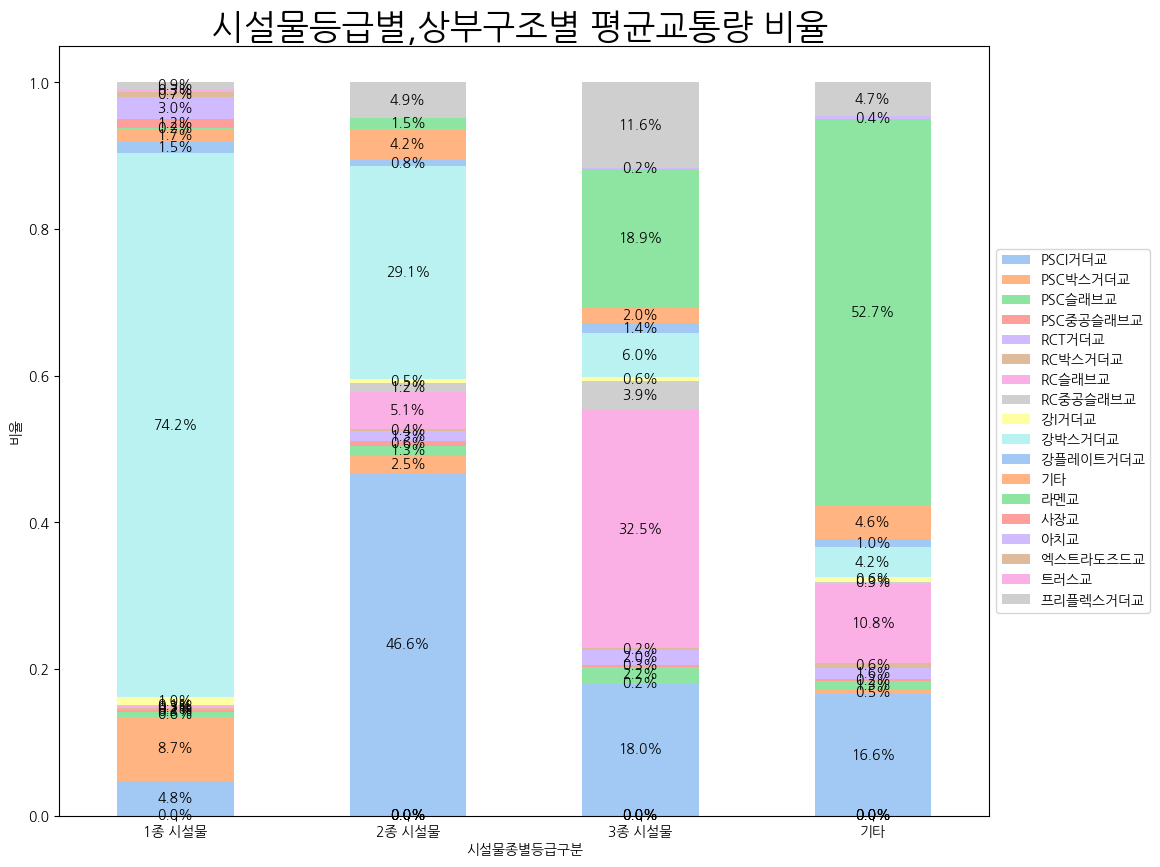

In [47]:
# 시설물등급별,상부구조별 평균교통량 비율 그래프
result = df.groupby(['New_facility', '상부구조형식'])['교통량'].count().unstack().apply(lambda x: x / x.sum(), axis=1)
sns.set_palette("pastel")
ax = result.plot(kind = 'bar', stacked = True, figsize = (12,10))
plt.title('시설물등급별,상부구조별 평균교통량 비율 ', fontsize = 25)
plt.xlabel('시설물종별등급구분')
plt.ylabel('비율')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xticks(rotation = 0)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(height*100)+'%', xy=(left+width/2, bottom+height/2), ha = 'center', va = 'center')
plt.sca(ax)

plt.show()

### 시설물등급별,상부구조별 평균교통량 비율 그래프 결과해석
* 1종시설물로 분류된 교량중에서는 강박스거더교 형태의 교량의 교통량 비율이 높게 나타남
* 2종시설물로 분류된 교량중에서는 PSCI거더교와 강박스거더교 형태의 교량의 교통량 비율이 높게 나타남
* 3종시설물로 분류된 교량중에서는 트러스교형태의 교량에서 교통량비율이 가장 높게 나타남
* 기타로 분류된 교량중에서는 라멘교 형태의 교량에서 교통량비율이 높게 나옴

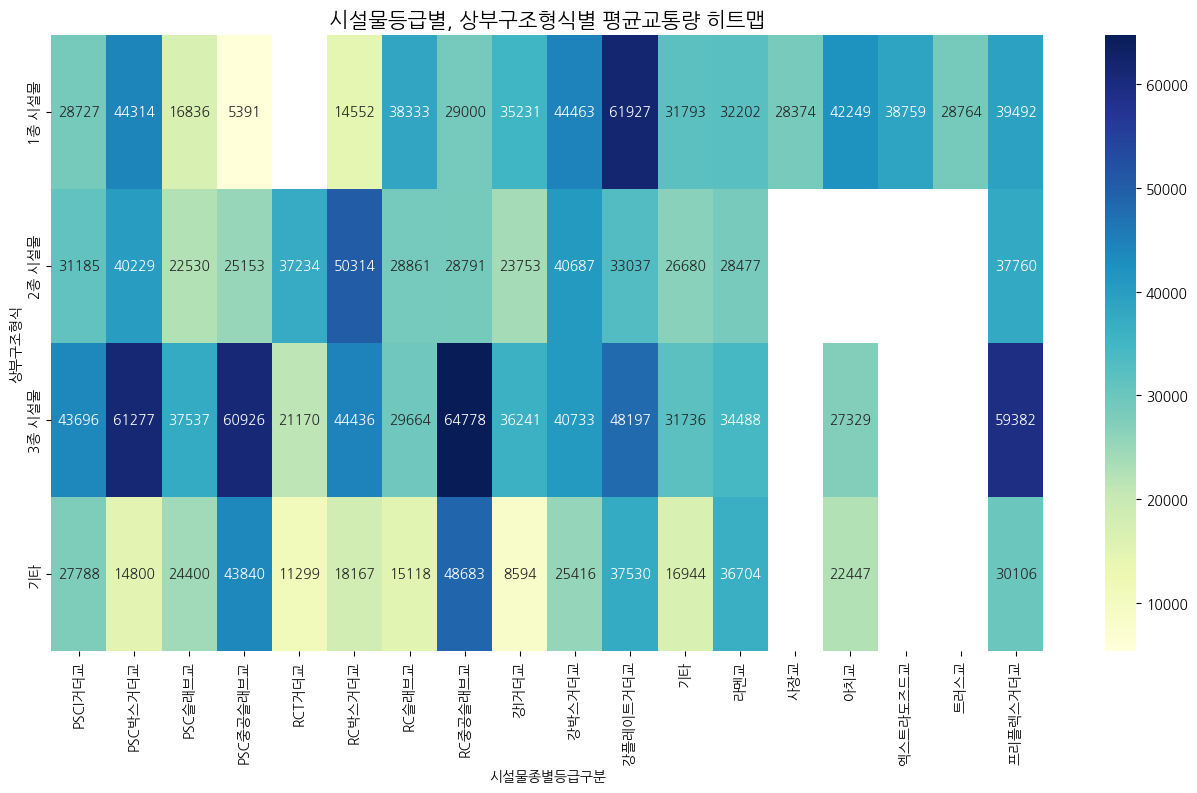

In [58]:
# 시설물등급별, 상부구조형식, 평균교통량 히트맵
pivot = df.pivot_table(index = 'New_facility', columns = '상부구조형식', values = '교통량')

plt.figure(figsize = (16, 8))
sns.heatmap(pivot, annot = True, fmt = '.0f', cmap = 'YlGnBu')
plt.title('시설물등급별, 상부구조형식별 평균교통량 히트맵', fontsize = 15)
plt.xlabel('시설물종별등급구분')
plt.ylabel('상부구조형식')
plt.show()

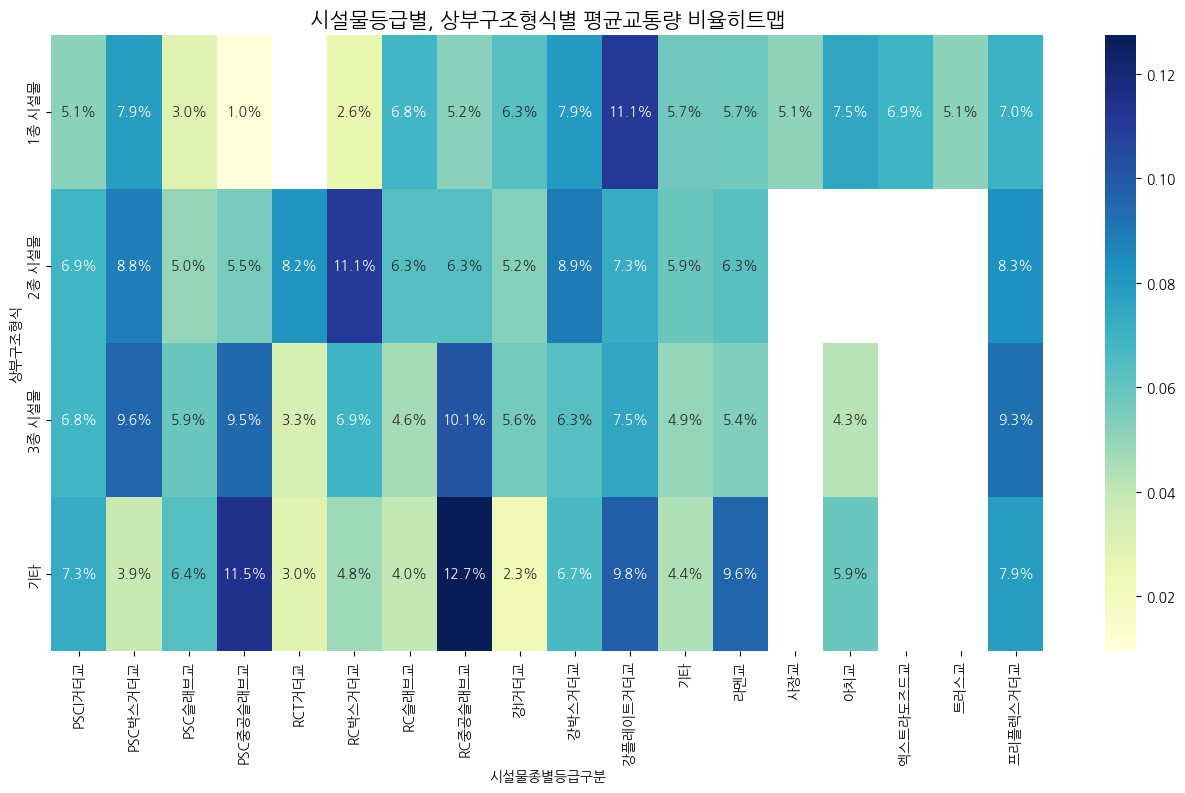

In [61]:
# 시설물등급별, 상부구조형식, 평균교통량 히트맵
pivot = df.pivot_table(index = 'New_facility', columns = '상부구조형식', values = '교통량')
total_counts = pivot.sum(axis=1)
pivot_ratio = pivot.div(total_counts, axis=0)

plt.figure(figsize = (16, 8))
sns.heatmap(pivot_ratio, annot = True, fmt='.1%', cmap = 'YlGnBu')
plt.title('시설물등급별, 상부구조형식별 평균교통량 비율히트맵', fontsize = 15)
plt.xlabel('시설물종별등급구분')
plt.ylabel('상부구조형식')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_66060\4080211119.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


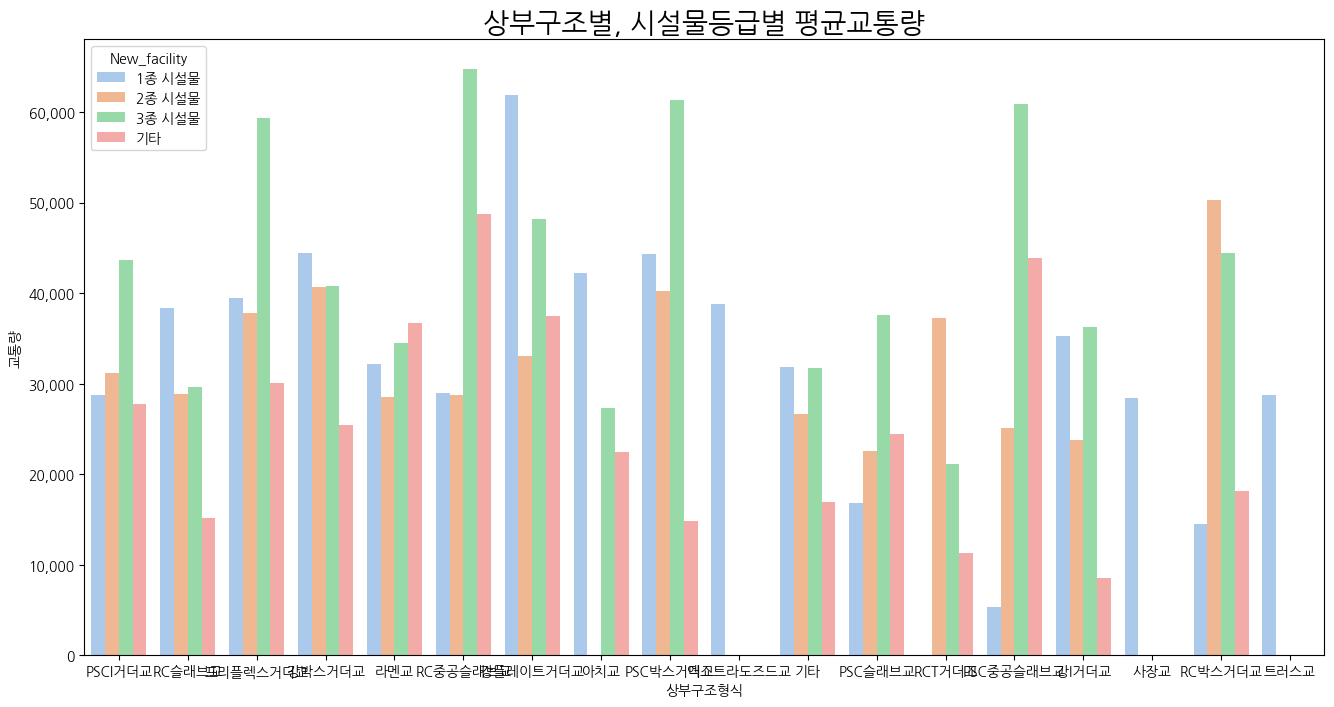

In [50]:
# 상부구조, 시설물등급별 평균교통량 확인

plt.figure(figsize = (16, 8))
sns.barplot(x = '상부구조형식', y = '교통량', hue = 'New_facility', palette = 'pastel', data = df,
            errorbar = None, hue_order = ['1종 시설물', '2종 시설물', '3종 시설물', '기타'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('상부구조별, 시설물등급별 평균교통량', fontsize = 20)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'PSCI거더교'),
  Text(1, 0, 'PSC박스거더교'),
  Text(2, 0, 'PSC슬래브교'),
  Text(3, 0, 'PSC중공슬래브교'),
  Text(4, 0, 'RCT거더교'),
  Text(5, 0, 'RC박스거더교'),
  Text(6, 0, 'RC슬래브교'),
  Text(7, 0, 'RC중공슬래브교'),
  Text(8, 0, '강I거더교'),
  Text(9, 0, '강박스거더교'),
  Text(10, 0, '강플레이트거더교'),
  Text(11, 0, '기타'),
  Text(12, 0, '라멘교'),
  Text(13, 0, '사장교'),
  Text(14, 0, '아치교'),
  Text(15, 0, '엑스트라도즈드교'),
  Text(16, 0, '트러스교'),
  Text(17, 0, '프리플렉스거더교')])

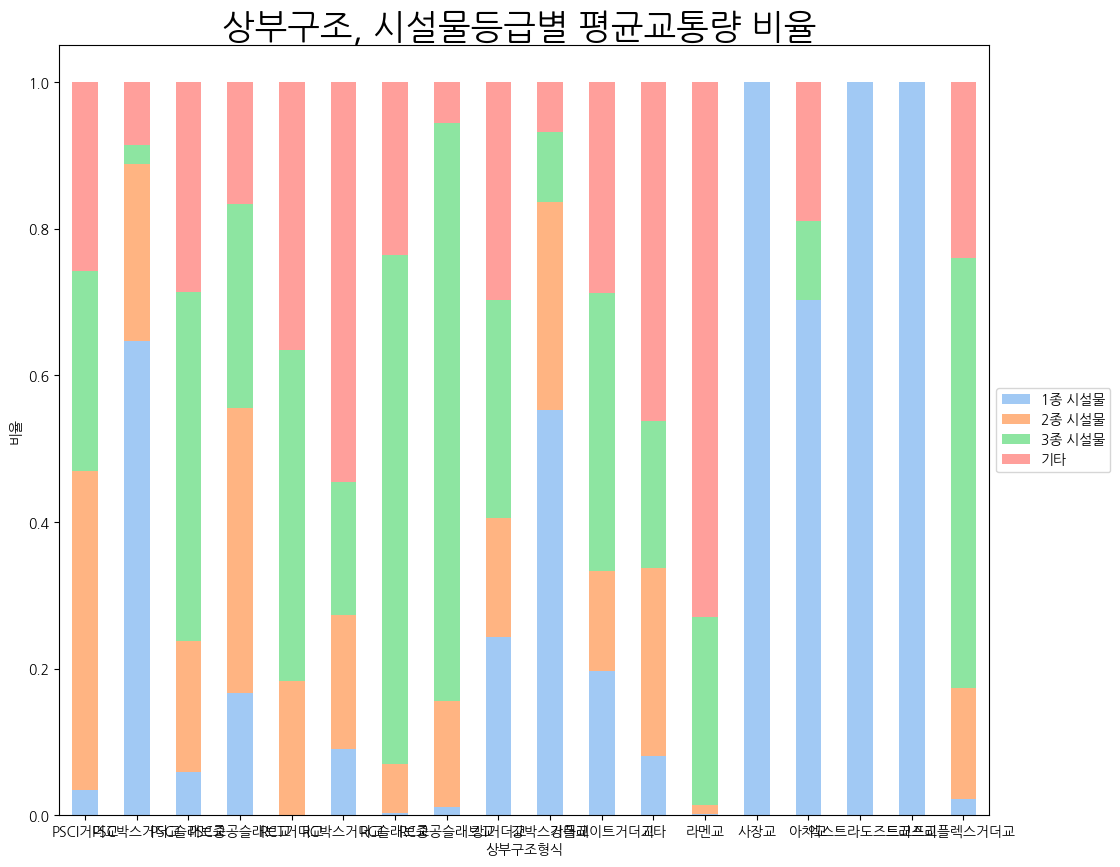

In [51]:
# 상부구조, 시설물등급별 평균교통량 비율 그래프
result = df.groupby(['상부구조형식', 'New_facility'])['교통량'].count().unstack().apply(lambda x: x / x.sum(), axis=1)

result.plot(kind = 'bar', stacked = True, figsize = (12,10))
plt.title('상부구조, 시설물등급별 평균교통량 비율 ', fontsize = 25)
plt.xlabel('상부구조형식')
plt.ylabel('비율')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xticks(rotation = 0)

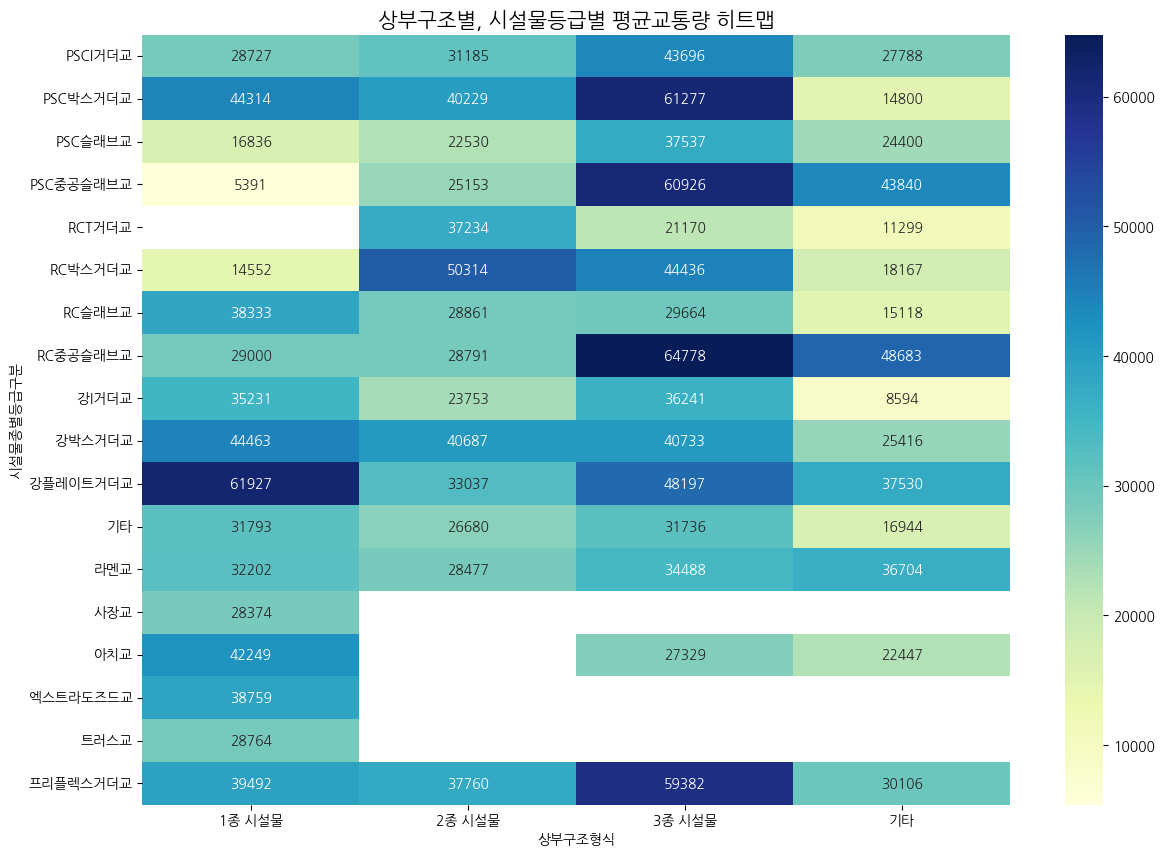

In [64]:
# 상부구조별, 시설물등급별 평균교통량 히트맵 
pivot = df.pivot_table(index = '상부구조형식', columns = 'New_facility', values = '교통량')

plt.figure(figsize=(14,10))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('상부구조별, 시설물등급별 평균교통량 히트맵', fontsize = 15)
plt.xlabel('상부구조형식')
plt.ylabel('시설물종별등급구분')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_66060\1904812071.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


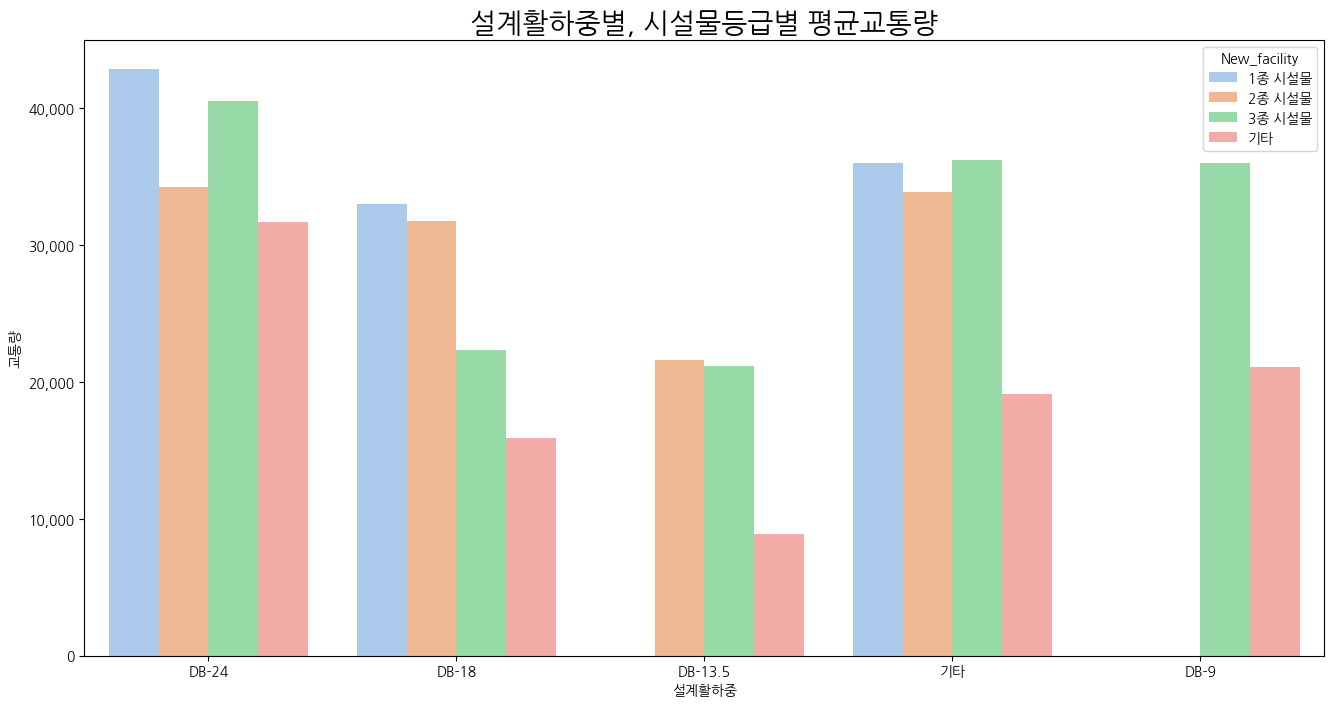

In [53]:
# 설계하중, 시설물종별등급구분별 평균교통량
plt.figure(figsize = (16, 8))
sns.barplot(x = '설계활하중', y = '교통량', hue = 'New_facility', palette = 'pastel', data = df,
            errorbar = None, hue_order = ['1종 시설물', '2종 시설물', '3종 시설물', '기타'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('설계활하중별, 시설물등급별 평균교통량', fontsize = 20)
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'DB-24'),
  Text(1, 0, 'DB-18'),
  Text(2, 0, 'DB-13.5'),
  Text(3, 0, 'DB-9'),
  Text(4, 0, '기타')])

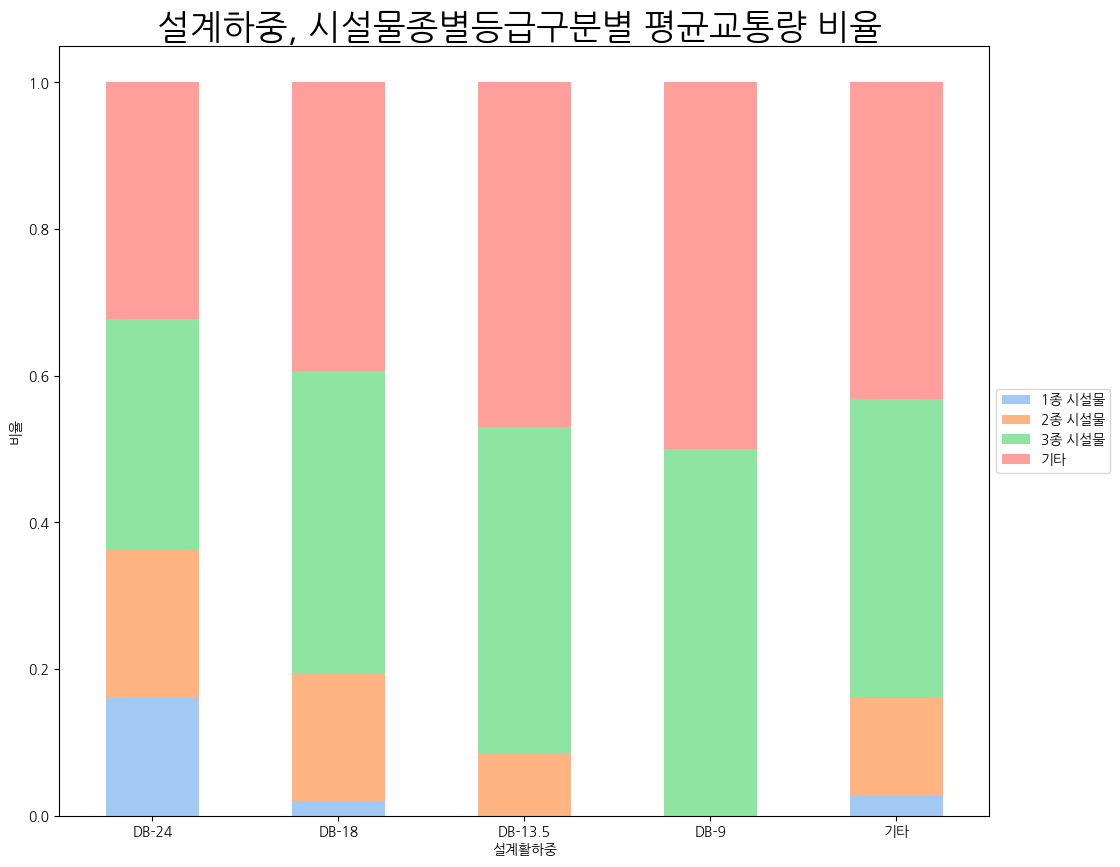

In [54]:
# 설계하중, 시설물종별등급구분별 평균교통량 비율 
result = df.groupby(['설계활하중', 'New_facility'])['교통량'].count().unstack().apply(lambda x: x / x.sum(), axis=1)
order = ['DB-24', 'DB-18', 'DB-13.5', 'DB-9', '기타']
result = result.reindex(index = order)
sns.set_palette("pastel")
result.plot(kind = 'bar', stacked = True, figsize = (12,10))
plt.title('설계하중, 시설물종별등급구분별 평균교통량 비율 ', fontsize = 25)
plt.xlabel('설계활하중')
plt.ylabel('비율')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xticks(rotation = 0)

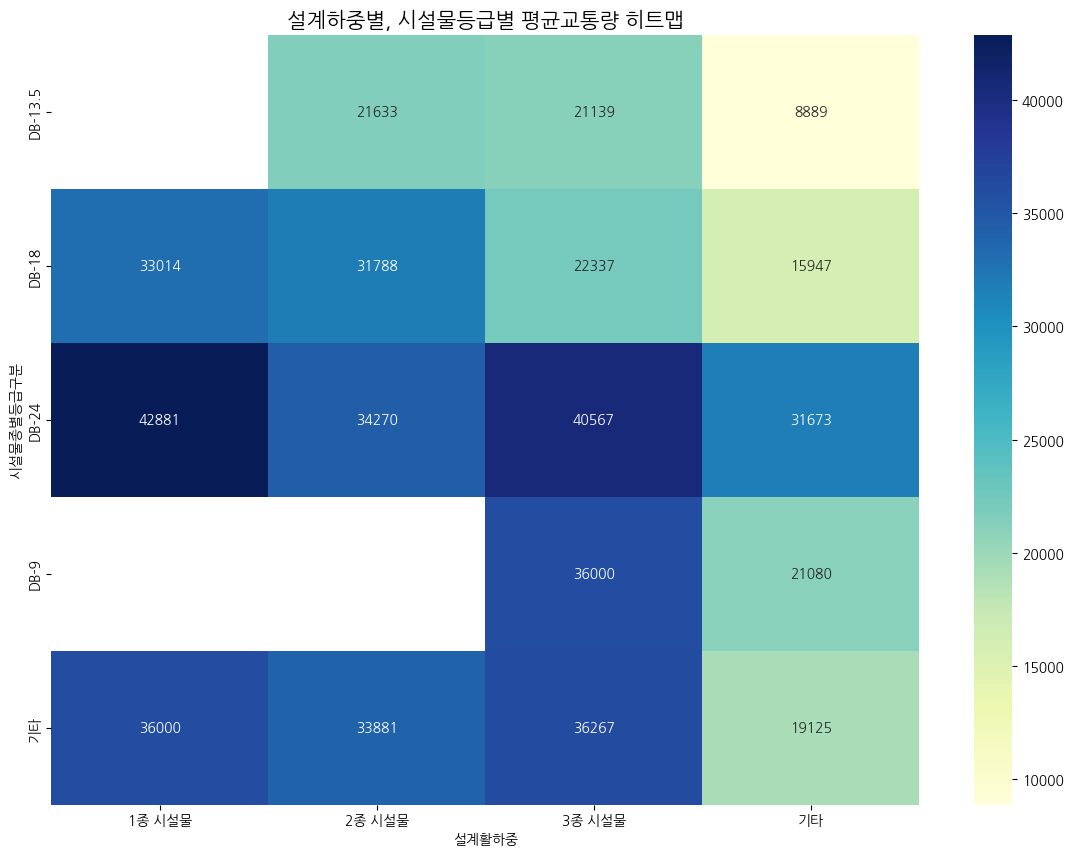

In [55]:
# 설계하중, 시설물종별등급구분별 평균교통량 히트맵 
pivot_table = df.pivot_table(index = '설계활하중', columns = 'New_facility', values = '교통량')

plt.figure(figsize=(14,10))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('설계하중별, 시설물등급별 평균교통량 히트맵', fontsize = 15)
plt.xlabel('설계활하중')
plt.ylabel('시설물종별등급구분')
plt.show()